<ipython-input-105-783a02bb746b>:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cumulative_data_resampled = cumulative_data.resample('5Y').last()  # Take the last value every 5 years


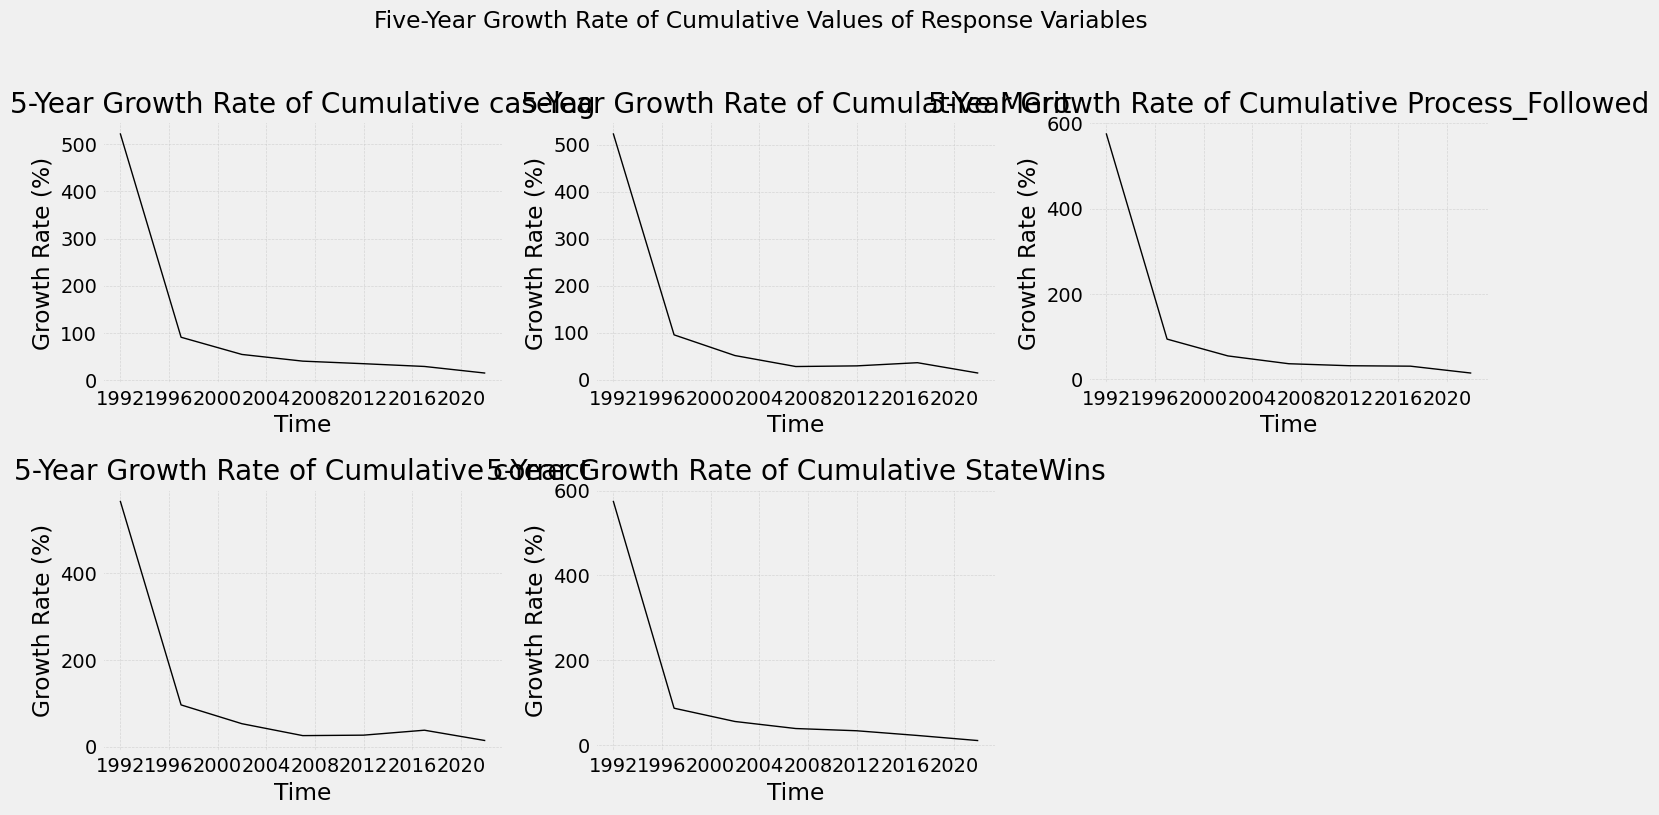

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('DataTeam2_no_na.csv')

# Ensure 'year' column exists in your dataset for cumulative calculations over time
time_column = 'year'  # Replace with the actual time column name if different

# Convert the 'year' column to a datetime format, assuming it represents years
data[time_column] = pd.to_datetime(data[time_column], format='%Y')

# Response variables
response_vars = ['caselag', 'Merit', 'Process_Followed', 'correct', 'StateWins']

# Sort data by time for accurate cumulative calculations
data = data.sort_values(by=time_column)

# Set 'year' as the index for resampling
data.set_index(time_column, inplace=True)

# Calculate cumulative sum at each year for each variable
cumulative_data = data[response_vars].cumsum()

# Resample the cumulative data at five-year intervals and calculate growth rates
cumulative_data_resampled = cumulative_data.resample('5Y').last()  # Take the last value every 5 years
growth_rates = cumulative_data_resampled.pct_change() * 100  # Calculate percentage change (growth rate)

# Reset the index to get 'year' back as a column for plotting
growth_rates = growth_rates.reset_index()

# Set up plot with 2x3 grid (2 rows, 3 columns), leaving one subplot empty
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Five-Year Growth Rate of Cumulative Values of Response Variables', y=1.02)

# Flatten axes for easy indexing and set the last plot to be empty
axes = axes.flatten()
axes[-1].axis('off')  # Disable the last (extra) subplot

# Plot five-year growth rate line plots for each variable in its respective subplot
for i, var in enumerate(response_vars):
    axes[i].plot(growth_rates[time_column], growth_rates[var], color='black', linewidth=1)
    axes[i].set_title(f"5-Year Growth Rate of Cumulative {var}")
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Growth Rate (%)')
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


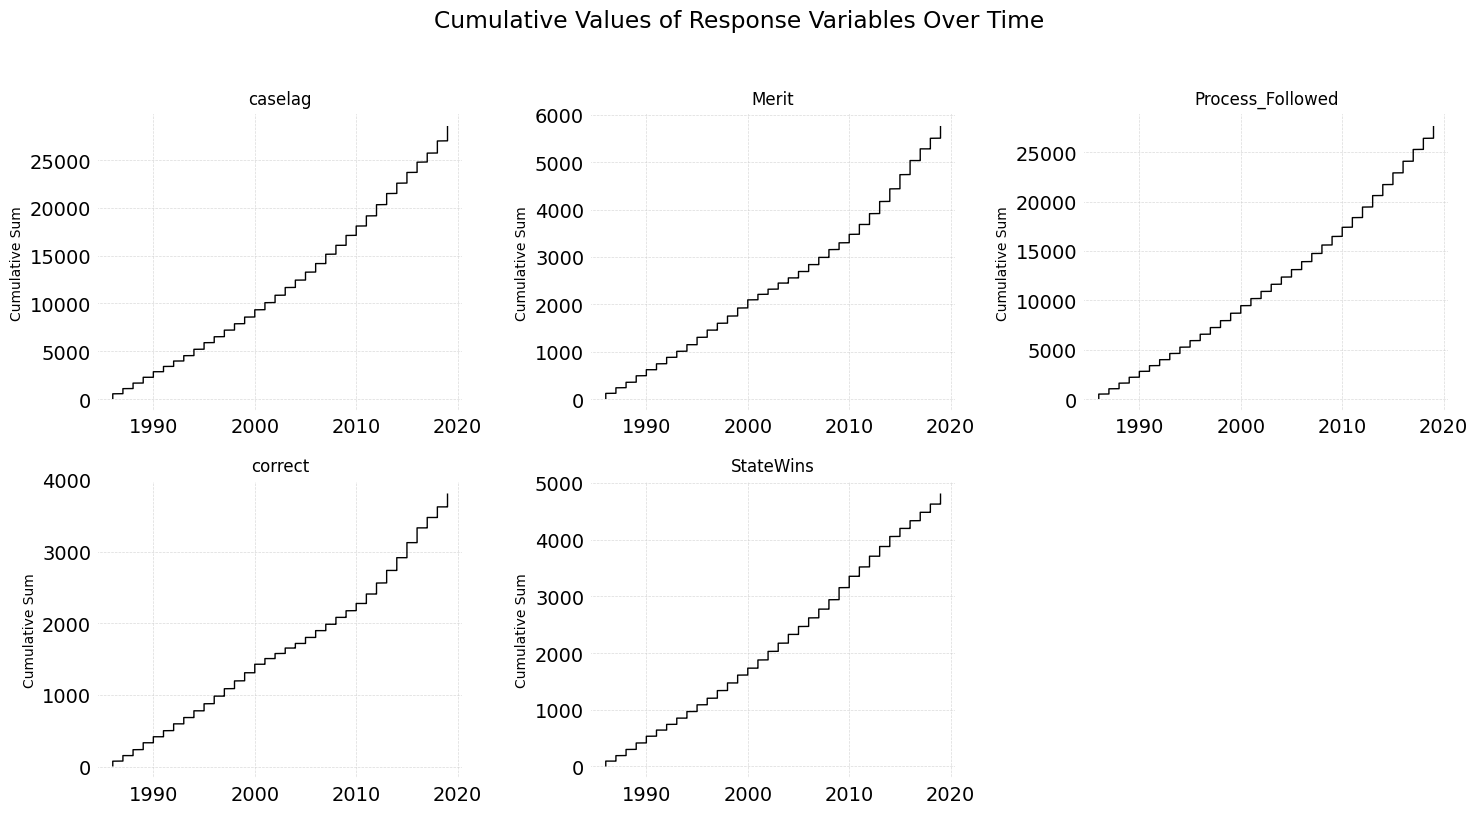

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure and axes edge color to white
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Load your data
data = pd.read_csv('DataTeam2_no_na.csv')

# Ensure 'year' column exists in your dataset for cumulative calculations over time
time_column = 'year'  # Replace with the actual time column name if different

# Response variables
response_vars = ['caselag', 'Merit', 'Process_Followed', 'correct', 'StateWins']

# Sort data by time for accurate cumulative calculations
data = data.sort_values(by=time_column)

# Calculate cumulative sum over time for each response variable
for var in response_vars:
    data[f'cumulative_{var}'] = data[var].cumsum()

# Set up plot with 2x3 grid (2 rows, 3 columns), leaving one subplot empty
fig, axes = plt.subplots(2, 3, figsize=(15, 8), facecolor='white')
fig.suptitle('Cumulative Values of Response Variables Over Time', y=1.02)

# Flatten axes for easy indexing and set the last plot to be empty
axes = axes.flatten()
axes[-1].axis('off')  # Disable the last (extra) subplot

# Plot cumulative line plots for each variable in its respective subplot
for i, var in enumerate(response_vars):
    axes[i].set_facecolor('white')  # Set individual subplot background to white
    axes[i].plot(data[time_column], data[f'cumulative_{var}'], color='black', linewidth=1)
    axes[i].set_title(f"{var}", fontsize=12)
   # axes[i].set_xlabel(, fontsize=10)
    axes[i].set_ylabel('Cumulative Sum', fontsize=10)
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


<ipython-input-97-fbc26b5b08ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[var].value_counts().index, y=data[var].value_counts(normalize=True), palette="pastel")
<ipython-input-97-fbc26b5b08ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[var].value_counts().index, y=data[var].value_counts(normalize=True), palette="pastel")
<ipython-input-97-fbc26b5b08ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[var].value_counts().index, y=data[var].value_counts(normalize=True), palette="pastel")
<ipython-input-97-f

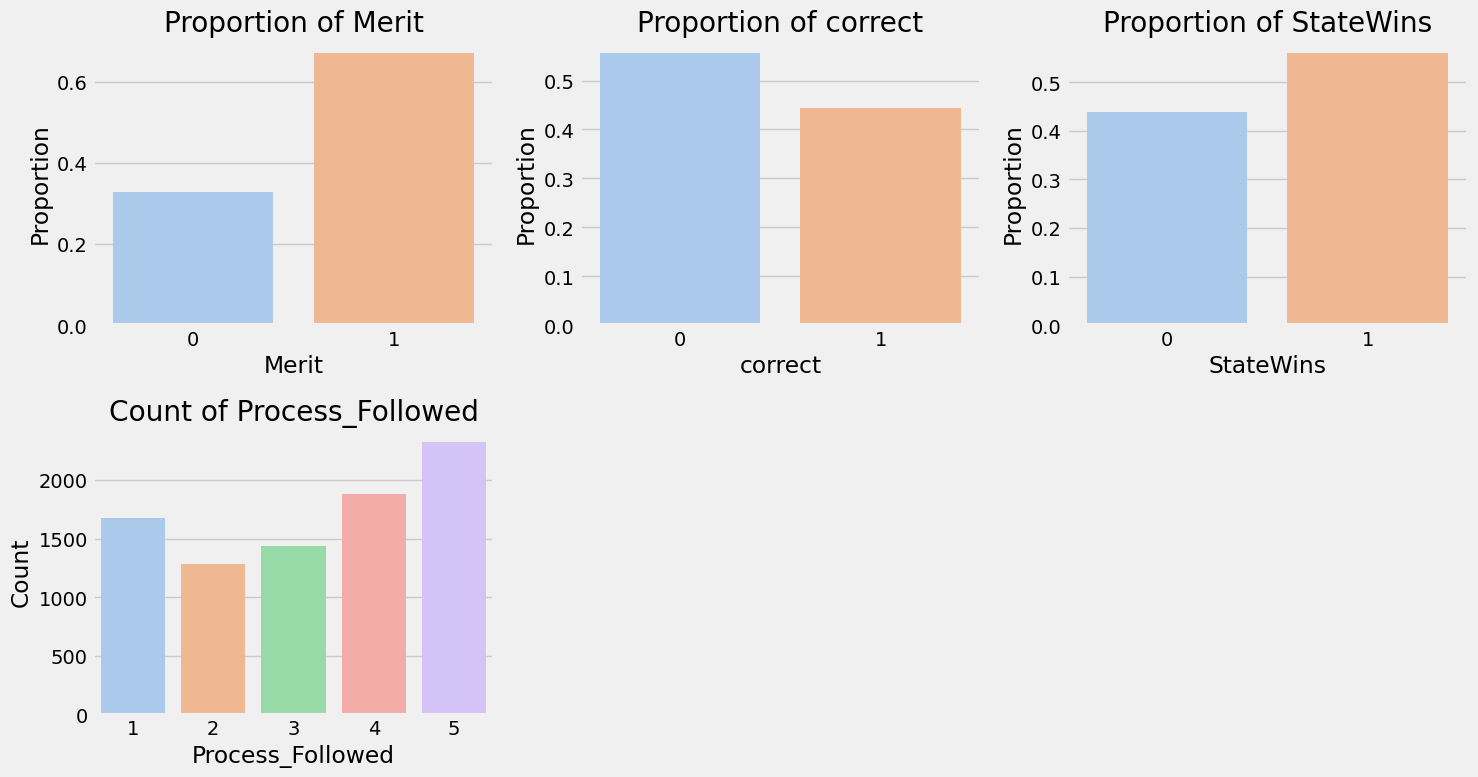

In [ ]:
#Descriptive Stats 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('DataTeam2_no_na.csv')

# Binary variables and categorical variable
binary_vars = ['Merit', 'correct', 'StateWins', 'Process_Followed']
#categorical_var = 'Process_Followed'

# Set up the plotting area
plt.figure(figsize=(15, 8))

# Plot for binary variables
for i, var in enumerate(binary_vars, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=data[var].value_counts().index, y=data[var].value_counts(normalize=True), palette="pastel")
    plt.title(f'Proportion of {var}')
    plt.ylabel('Proportion')
    plt.xlabel(var)

# Plot for categorical variable 'Process_Followed'
plt.subplot(2, 3, 4)
sns.countplot(x=categorical_var, data=data, palette="pastel")
plt.title(f'Count of {categorical_var}')
plt.ylabel('Count')
plt.xlabel(categorical_var)

plt.tight_layout()
plt.show()


KeyError: 'StateWins'

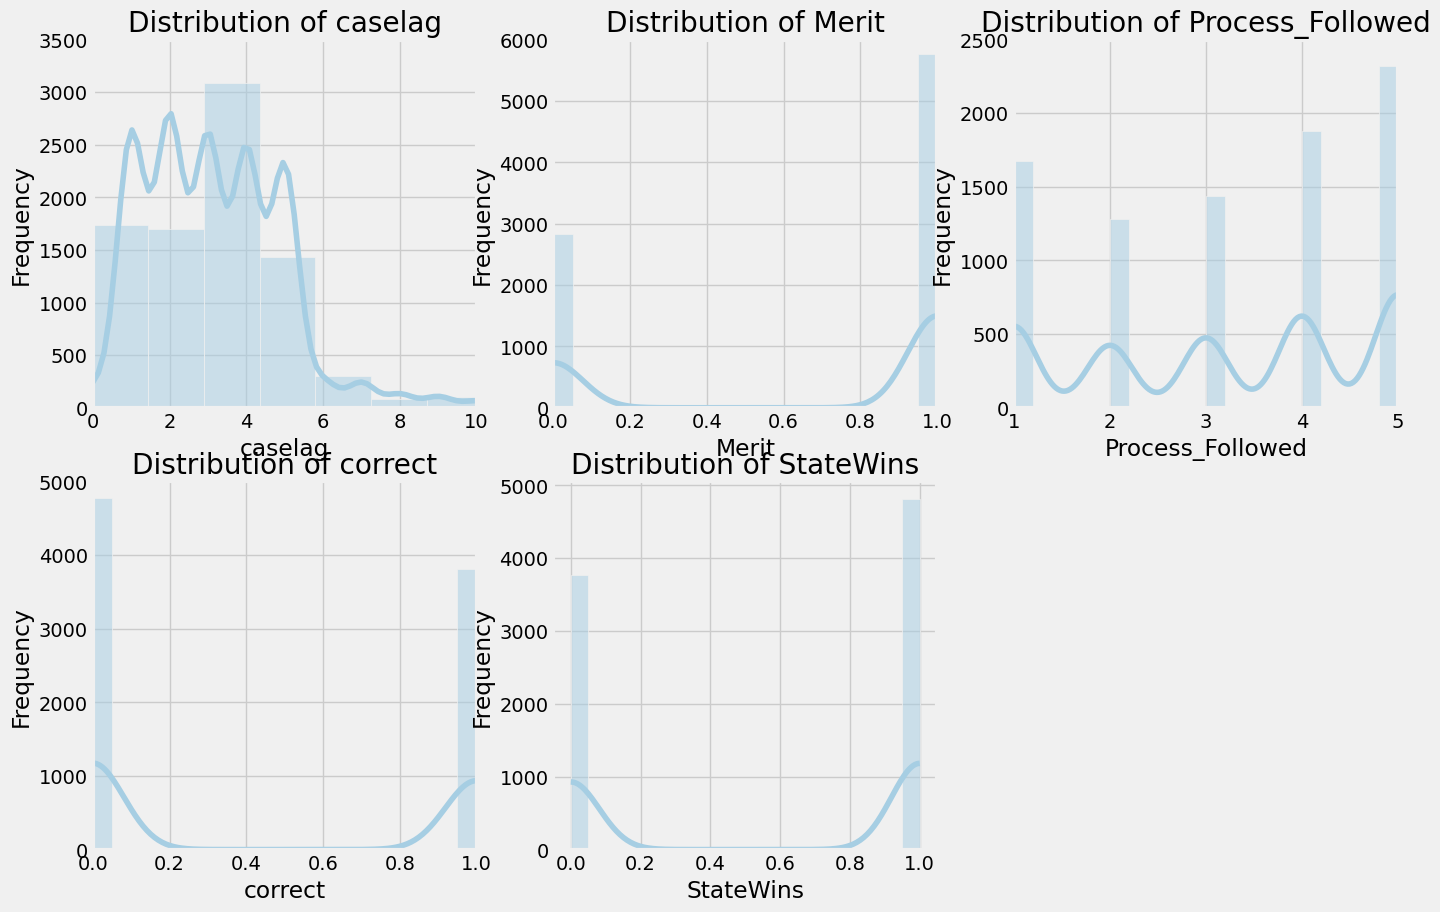

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# List of response variables
response_variables = ['caselag', 'Merit', 'Process_Followed', 'correct', 'StateWins']

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Define axis limits for each variable for better visualization
axis_limits = {
    'caselag': {'x': (0, 10), 'y': (0, 3500)},
    'Merit': {'x': (0, 1), 'y': (0, 6000)},
    'Process_Followed': {'x': (1, 5), 'y': (0, 2500)},
    'correct': {'x': (0, 1), 'y': (0, 5000)},
    'statewins': {'x': (0, 1), 'y': (0, 5000)}
}

for i, var in enumerate(response_variables, 1):
    plt.subplot(2, 3, i)  # Creating a 2x3 grid of plots for visualization
    sns.histplot(data[var], kde=True, bins=20)  # Histogram with density plot
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xlim(axis_limits[var]['x'])  # Set x-axis limits
    plt.ylim(axis_limits[var]['y'])  # Set y-axis limits

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:

#Summary Stats
import pandas as pd

data = pd.read_csv('DataTeam2_no_na.csv')

data['Cumulative_Retirement'] = data['Retirements2010xPost2010'].cumsum()
data['Cumulative_Appointed_Judges'] = data['Appointments2010xPost2010'].cumsum()

data['criminal_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Criminal_Bench' in x else 0)
data['tax_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Tax_Bench' in x else 0)
data['writ_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Writ_Bench' in x else 0)
data['property_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Property_Bench' in x else 0)

summary_stats = data[['Cumulative_Retirement', 'Cumulative_Appointed_Judges',
                      'criminal_bench', 'tax_bench', 'writ_bench', 'property_bench',
                      'StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].describe()

print("Summary Statistics:\n", summary_stats)

additional_stats = data[['Cumulative_Retirement', 'Cumulative_Appointed_Judges',
                         'criminal_bench', 'tax_bench', 'writ_bench', 'property_bench',
                         'StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].agg(['median', 'std'])

print("\nAdditional Statistics (median, std):\n", additional_stats)

mode_stats = data[['Cumulative_Retirement', 'Cumulative_Appointed_Judges',
                   'criminal_bench', 'tax_bench', 'writ_bench', 'property_bench',
                   'StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].mode()

print("\nMode Statistics:\n", mode_stats)

summary_stats.to_csv('summary_statistics.csv')
additional_stats.to_csv('additional_statistics.csv')
mode_stats.to_csv('mode_statistics.csv')


Summary Statistics:
        Cumulative_Retirement  Cumulative_Appointed_Judges  criminal_bench  \
count            8590.000000                  8590.000000     8590.000000   
mean               82.041772                    53.882812        0.277998   
std               127.461923                    83.034602        0.448038   
min                 0.000000                     0.000000        0.000000   
25%                 0.000000                     0.000000        0.000000   
50%                 0.000000                     0.000000        0.000000   
75%               147.700002                    99.583335        1.000000   
max               419.358339                   273.733337        1.000000   

         tax_bench   writ_bench  property_bench    StateWins      correct  \
count  8590.000000  8590.000000     8590.000000  8590.000000  8590.000000   
mean      0.270664     0.245751        0.205588     0.560419     0.443655   
std       0.444328     0.430557        0.404154     0.

In [ ]:
#Summary Stats 2
import pandas as pd

# Load the dataset
data = pd.read_csv('DataTeam2_no_na.csv')  # Replace 'path_to_your_data.csv' with the actual path to your CSV file

# Adjusted list of columns based on available columns in the dataset
columns_of_interest = [
    'Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
    'yeardecision', 'judgename_encode', 'Criminal_count_bench', 'Land_count_per_bench',
    'Human_count_per_bench', 'Specialization_bench', 'caselag', 'Merit', 'Process_Followed',
    'correct', 'StateWins'
]

# Filter the dataframe to include only the selected columns
data_filtered = data[columns_of_interest]

# Generate summary statistics for the selected columns
summary_statistics = data_filtered.describe(percentiles=[0.25, 0.5, 0.75]).transpose()

# Rename the summary statistics table to match the specified format
summary_statistics = summary_statistics.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std. Dev.',
    'min': 'Min',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Max'
})

# Display the summary statistics
print(summary_statistics)


                            Count         Mean   Std. Dev.     Min  \
Appointments2010xPost2010  8590.0     0.031867    0.116509     0.0   
Retirements2010xPost2010   8590.0     0.048819    0.152978     0.0   
Gender                     8567.0     0.960079    0.195784     0.0   
AppointmentYear            8567.0  2000.735380   10.203275  1959.0   
yeardecision               8590.0  2004.961816    9.698418  1986.0   
judgename_encode           8590.0   858.793481  168.281231   575.0   
Criminal_count_bench       8590.0     4.416997    9.163387     0.0   
Land_count_per_bench       8590.0     3.197090    3.542588     0.0   
Human_count_per_bench      8590.0     2.769732    2.956599     0.0   
caselag                    8590.0     3.325495    2.233591     0.0   
Merit                      8590.0     0.671013    0.469873     0.0   
Process_Followed           8590.0     3.220023    1.476251     1.0   
correct                    8590.0     0.443655    0.496844     0.0   
StateWins           

In [ ]:
#OLS
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('DataTeam2_no_na.csv')

X = data[['Appointments2010xPost2010']]
X = sm.add_constant(X)  # Add intercept

control_vars = ['StateWins', 'caselag', 'Merit', 'Process_Followed', 'correct']
data['response_var'] = data[control_vars].sum(axis=1)

predictor_vars = ['Retirements2010xPost2010']
X = pd.concat([X, data[predictor_vars]], axis=1)

y = data['response_var']

model = sm.OLS(y, X, missing='drop').fit()

print(model.summary())

latex_output = model.summary().as_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)



                            OLS Regression Results                            
Dep. Variable:           response_var   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     42.63
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.77e-19
Time:                        23:37:26   Log-Likelihood:                -21227.
No. Observations:                8590   AIC:                         4.246e+04
Df Residuals:                    8587   BIC:                         4.248e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

** OLS 2**

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Define the response variable and control variables
response_var = ['StateWins','caselag', 'Merit', 'Process_Followed', 'correct']  # Use "StateWins" directly as the dependent variable
#control_vars = ['caselag', 'Merit', 'Process_Followed', 'correct']  # Controls excluding "StateWins"
predictor_vars_years = [
    ('Retirements_2007_Post2010', 'Retirements in 2007 x post 2010'),
    ('Retirements_2008_Post2010', 'Retirements in 2008 x post 2010'),
    ('Retirements_2009_Post2010', 'Retirements in 2009 x post 2010'),
    ('Retirements_2010_Post2010', 'Retirements in 2010 x post 2010')
]

# Create a DataFrame to store results
results_df = pd.DataFrame()

# Run OLS regressions for each predictor variable and store the results
for predictor_var, predictor_label in predictor_vars_years:
    # Define the independent variables with controls and the predictor
    X = data[[predictor_var]]

    # Add fixed effects if needed (e.g., district-year fixed effects)
    if 'district_year' in data.columns:
        X = pd.concat([X, pd.get_dummies(data['district_year'], drop_first=True)], axis=1)

    X = sm.add_constant(X)  # Add intercept
    y = data[response_var]  # Use "StateWins" as the dependent variable

    model = sm.OLS(y, X, missing='drop').fit()

    # Store the coefficient, standard error, p-value, number of observations, and R-squared for the predictor variable
    results_df[predictor_label] = [
        model.params[predictor_var],
        model.bse[predictor_var],
        model.pvalues[predictor_var],
        model.nobs,
        model.rsquared
    ]

# Label the rows
results_df.index = ['Coefficient', 'Std. Error', 'P-value', 'Observations', 'R-squared']

# Display the results
print(results_df)

# Optionally save the results to a LaTeX file
latex_output = results_df.to_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)


KeyError: 'Retirements_2007_Post2010'

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

control_vars = ['StateWins', 'caselag', 'Merit', 'Process_Followed', 'correct']
predictor_vars_years = [
    ('Retirements_2007_Post2010', 'Retirements in 2007 x post 2010'),
    ('Retirements_2008_Post2010', 'Retirements in 2008 x post 2010'),
    ('Retirements_2009_Post2010', 'Retirements in 2009 x post 2010'),
    ('Retirements_2010_Post2010', 'Retirements in 2010 x post 2010'),
]

data['response_var'] = data[control_vars].sum(axis=1)

results_df = pd.DataFrame()

# Run OLS regressions for each predictor variable and store the results
for predictor_var, predictor_label in predictor_vars_years:
    X = data[predictor_var]
    X = sm.add_constant(X)  # Add intercept
    y = data['response_var']

    model = sm.OLS(y, X, missing='drop').fit()

    # Store the coefficient, standard error, p-value, number of observations, and R-squared for the predictor variable
    results_df[predictor_label] = [
        model.params[predictor_var],
        model.bse[predictor_var],
        model.pvalues[predictor_var],
        model.nobs,
        model.rsquared
    ]

# Label the rows
results_df.index = ['Coefficient', 'Std. Error', 'P-value', 'Observations', 'R-squared']

# Display the results
print(results_df)

# Optionally save the results to a LaTeX file
latex_output = results_df.to_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)


              Retirements in 2007 x post 2010  \
Coefficient                          0.117152   
Std. Error                           0.270884   
P-value                              0.665405   
Observations                      8590.000000   
R-squared                            0.000022   

              Retirements in 2008 x post 2010  \
Coefficient                          0.573348   
Std. Error                           0.377006   
P-value                              0.128349   
Observations                      8590.000000   
R-squared                            0.000269   

              Retirements in 2009 x post 2010  Retirements in 2010 x post 2010  
Coefficient                          0.613096                     1.864804e+00  
Std. Error                           0.156785                     2.020200e-01  
P-value                              0.000093                     3.330465e-20  
Observations                      8590.000000                     8.590000e+03  
R-squ

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Define control variables and predictor variables for each year
control_vars = ['caselag', 'Merit', 'Process_Followed', 'correct']  # Exclude 'StateWins' from control vars
predictor_vars_years = [
    ('Retirements_2007_Post2010', 'Retirements in 2007 x post 2010'),
    ('Retirements_2008_Post2010', 'Retirements in 2008 x post 2010'),
    ('Retirements_2009_Post2010', 'Retirements in 2009 x post 2010'),
    ('Retirements_2010_Post2010', 'Retirements in 2010 x post 2010'),
]

# Define response variable
response_var = 'StateWins'  # Use "StateWins" as the dependent variable

# Create a DataFrame to store results
results_df = pd.DataFrame()

# Run OLS regressions for each predictor variable, both with and without controls
for predictor_var, predictor_label in predictor_vars_years:

    # Regression without additional controls
    X_no_controls = data[[predictor_var]]
    X_no_controls = sm.add_constant(X_no_controls)
    y = data[response_var]

    model_no_controls = sm.OLS(y, X_no_controls, missing='drop').fit()

    # Check if predictor variable is in the model's parameters
    if predictor_var in model_no_controls.params:
        # Store the results for the model without controls
        results_df[predictor_label + ' (No Controls)'] = [
            model_no_controls.params[predictor_var],
            model_no_controls.bse[predictor_var],
            model_no_controls.pvalues[predictor_var],
            model_no_controls.nobs,
            model_no_controls.rsquared
        ]
    else:
        print(f"Warning: {predictor_var} not found in model_no_controls.params")

    # Regression with additional controls
    X_with_controls = data[control_vars + [predictor_var]]
    X_with_controls = sm.add_constant(X_with_controls)

    model_with_controls = sm.OLS(y, X_with_controls, missing='drop').fit()

    # Check if predictor variable is in the model's parameters
    if predictor_var in model_with_controls.params:
        # Store the results for the model with controls
        results_df[predictor_label + ' (With Controls)'] = [
            model_with_controls.params[predictor_var],
            model_with_controls.bse[predictor_var],
            model_with_controls.pvalues[predictor_var],
            model_with_controls.nobs,
            model_with_controls.rsquared
        ]
    else:
        print(f"Warning: {predictor_var} not found in model_with_controls.params")

# Label the rows
results_df.index = ['Coefficient', 'Std. Error', 'P-value', 'Observations', 'R-squared']

# Display the results
print(results_df)

# Optionally save the results to a LaTeX file
latex_output = results_df.to_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)


              Retirements in 2007 x post 2010 (No Controls)  \
Coefficient                                       -0.201882   
Std. Error                                         0.046666   
P-value                                            0.000015   
Observations                                    8590.000000   
R-squared                                          0.002174   

              Retirements in 2007 x post 2010 (With Controls)  \
Coefficient                                         -0.132292   
Std. Error                                           0.041692   
P-value                                              0.001514   
Observations                                      8590.000000   
R-squared                                            0.205013   

              Retirements in 2008 x post 2010 (No Controls)  \
Coefficient                                       -0.198751   
Std. Error                                         0.064992   
P-value                                  

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Define control variables
control_vars = ['StateWins', 'caselag', 'Merit', 'Process_Followed', 'correct']

# Apply PCA to the control variables to create a single principal component
pca = PCA(n_components=1)
data['response_var'] = pca.fit_transform(data[control_vars])

# Define predictor variables for each year
predictor_vars_years = [
    ('Retirements_2007_Post2010', 'Retirements in 2007 x post 2010'),
    ('Retirements_2008_Post2010', 'Retirements in 2008 x post 2010'),
    ('Retirements_2009_Post2010', 'Retirements in 2009 x post 2010'),
    ('Retirements_2010_Post2010', 'Retirements in 2010 x post 2010'),
    ('Appointments_2010_Post2010', 'Appointments in 2010 x post 2010')
]

# Create a DataFrame to store results
results_df = pd.DataFrame()

# Run OLS regressions for each predictor variable and store the results
for predictor_var, predictor_label in predictor_vars_years:
    # Define the independent variables with controls and the predictor
    X = data[control_vars + [predictor_var]]
    X = sm.add_constant(X)  # Add intercept
    y = data['response_var']  # Use PCA-based response variable

    model = sm.OLS(y, X, missing='drop').fit()

    # Store the coefficient, standard error, p-value, number of observations, and R-squared for the predictor variable
    results_df[predictor_label] = [
        model.params[predictor_var],
        model.bse[predictor_var],
        model.pvalues[predictor_var],
        model.nobs,
        model.rsquared
    ]

# Label the rows
results_df.index = ['Coefficient', 'Std. Error', 'P-value', 'Observations', 'R-squared']

# Display the results
print(results_df)

# Optionally save the results to a LaTeX file
latex_output = results_df.to_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)


              Retirements in 2007 x post 2010  \
Coefficient                      3.894454e-16   
Std. Error                       7.107386e-16   
P-value                          5.837442e-01   
Observations                     8.590000e+03   
R-squared                        1.000000e+00   

              Retirements in 2008 x post 2010  \
Coefficient                      5.368969e-16   
Std. Error                       1.610601e-15   
P-value                          7.388768e-01   
Observations                     8.590000e+03   
R-squared                        1.000000e+00   

              Retirements in 2009 x post 2010  \
Coefficient                      3.700382e-16   
Std. Error                       3.558135e-16   
P-value                          2.983795e-01   
Observations                     8.590000e+03   
R-squared                        1.000000e+00   

              Retirements in 2010 x post 2010  \
Coefficient                      1.346579e-15   
Std. Error       

In [ ]:
#Weighted average
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Define control variables and their respective weights for the weighted average
control_vars = ['StateWins', 'caselag', 'Merit', 'Process_Followed', 'correct']
weights = {'StateWins': 0.3, 'caselag': 0.2, 'Merit': 0.1, 'Process_Followed': 0.2, 'correct': 0.2}

# Create the response variable as a weighted average of control variables
data['response_var'] = sum(data[var] * weight for var, weight in weights.items())

# Define predictor variables for each year
predictor_vars_years = [
    ('Retirements_2007_Post2010', 'Retirements in 2007 x post 2010'),
    ('Retirements_2008_Post2010', 'Retirements in 2008 x post 2010'),
    ('Retirements_2009_Post2010', 'Retirements in 2009 x post 2010'),
    ('Retirements_2010_Post2010', 'Retirements in 2010 x post 2010'),
    ]

# Create a DataFrame to store results
results_df = pd.DataFrame()

# Run OLS regressions for each predictor variable and store the results
for predictor_var, predictor_label in predictor_vars_years:
    # Define the independent variables with controls and the predictor
    X = data[[predictor_var]]
    X = sm.add_constant(X)  # Add intercept
    y = data['response_var']  # Use the weighted average as the dependent variable

    model = sm.OLS(y, X, missing='drop').fit()

    # Store the coefficient, standard error, p-value, number of observations, and R-squared for the predictor variable
    results_df[predictor_label] = [
        model.params[predictor_var],
        model.bse[predictor_var],
        model.pvalues[predictor_var],
        model.nobs,
        model.rsquared
    ]

# Label the rows
results_df.index = ['Coefficient', 'Std. Error', 'P-value', 'Observations', 'R-squared']

# Display the results
print(results_df)

# Optionally save the results to a LaTeX file
latex_output = results_df.to_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)


              Retirements in 2007 x post 2010  \
Coefficient                         -0.011650   
Std. Error                           0.052794   
P-value                              0.825349   
Observations                      8590.000000   
R-squared                            0.000006   

              Retirements in 2008 x post 2010  \
Coefficient                          0.064916   
Std. Error                           0.073482   
P-value                              0.377030   
Observations                      8590.000000   
R-squared                            0.000091   

              Retirements in 2009 x post 2010  Retirements in 2010 x post 2010  
Coefficient                          0.097056                     3.203800e-01  
Std. Error                           0.030565                     3.941550e-02  
P-value                              0.001502                     4.960137e-16  
Observations                      8590.000000                     8.590000e+03  
R-squ

**IV Results**

**Doing the NEW IV**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

data = pd.read_csv('DataTeam2_no_na.csv')

data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

endog = data['Appointments2010xPost2010']  # Endogenous variable (X)
instrument = data['Retirements2010xPost2010']  # Instrument variable (Z)

Y = data['judicial_decision_quality']

fixed_effects = ['AppointmentYear']

exog = sm.add_constant(data[fixed_effects])

exog_clean = exog.replace([np.inf, -np.inf], np.nan).dropna()
Y_clean = Y.loc[exog_clean.index]
endog_clean = endog.loc[exog_clean.index]
instrument_clean = instrument.loc[exog_clean.index]

# --- First Stage ---
first_stage_model = sm.OLS(endog_clean, sm.add_constant(instrument_clean)).fit()

# --- Second Stage for 2SLS (IV) ---
iv_model = IV2SLS(
    dependent=Y_clean,
    exog=exog_clean,
    endog=endog_clean,
    instruments=instrument_clean
).fit()


print("\nFirst Stage (X on Z):\n")
print(first_stage_model.summary())  # This is fine as it is

print("\nSecond Stage (Y on X predicted from Z) - 2SLS:\n")
print(iv_model.summary)  # Remove the parentheses here




First Stage (X on Z):

                                OLS Regression Results                               
Dep. Variable:     Appointments2010xPost2010   R-squared:                       0.779
Model:                                   OLS   Adj. R-squared:                  0.779
Method:                        Least Squares   F-statistic:                 3.021e+04
Date:                       Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                               01:17:11   Log-Likelihood:                 12720.
No. Observations:                       8567   AIC:                        -2.544e+04
Df Residuals:                           8565   BIC:                        -2.542e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Create a response variable for judicial decision quality
data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

# Define endogenous variable (X), instrument variable (Z), and dependent variable (Y)
endog = data['Appointments2010xPost2010']  # Endogenous variable
instrument = data['Retirements2010xPost2010']  # Instrument
Y = data['judicial_decision_quality']  # Dependent variable

# Define fixed effects and case/bench controls
fixed_effects = ['AppointmentYear']
case_bench_controls = ['caselag', 'Merit', 'Process_Followed', 'correct']

# --- Without Controls ---
# Define exogenous variables (fixed effects only)
exog_no_controls = sm.add_constant(data[fixed_effects])

# First Stage - No Controls
first_stage_no_controls = sm.OLS(endog, sm.add_constant(instrument)).fit()

# Second Stage - 2SLS No Controls
iv_model_no_controls = IV2SLS(
    dependent=Y,
    exog=exog_no_controls,
    endog=endog,
    instruments=instrument
).fit()

# --- With Controls ---
# Define exogenous variables (fixed effects + case/bench controls)
exog_with_controls = sm.add_constant(data[fixed_effects + case_bench_controls])

# First Stage - With Controls
first_stage_with_controls = sm.OLS(endog, sm.add_constant(data[['Retirements2010xPost2010'] + case_bench_controls])).fit()

# Second Stage - 2SLS With Controls
iv_model_with_controls = IV2SLS(
    dependent=Y,
    exog=exog_with_controls,
    endog=endog,
    instruments=instrument
).fit()

# --- Print Results ---
print("\n--- OLS and IV Results ---\n")

# First Stage Results
print("First Stage (No Controls):")
print(first_stage_no_controls.summary())

print("\nFirst Stage (With Controls):")
print(first_stage_with_controls.summary())

# Second Stage Results (2SLS)
print("\nSecond Stage (2SLS - No Controls):")
print(iv_model_no_controls.summary)

print("\nSecond Stage (2SLS - With Controls):")
print(iv_model_with_controls.summary)


/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(



--- OLS and IV Results ---

First Stage (No Controls):
                                OLS Regression Results                               
Dep. Variable:     Appointments2010xPost2010   R-squared:                       0.779
Model:                                   OLS   Adj. R-squared:                  0.779
Method:                        Least Squares   F-statistic:                 3.030e+04
Date:                       Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                               01:22:40   Log-Likelihood:                 12766.
No. Observations:                       8590   AIC:                        -2.553e+04
Df Residuals:                           8588   BIC:                        -2.551e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025    

In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Create a response variable for judicial decision quality
data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

# Define endogenous variable (X), instrument variable (Z), and dependent variable (Y)
endog = data['Appointments2010xPost2010']  # Endogenous variable
instrument = data['Retirements2010xPost2010']  # Instrument
Y = data['judicial_decision_quality']  # Dependent variable

# Define fixed effects and case/bench controls
fixed_effects = ['AppointmentYear']
case_bench_controls = ['caselag', 'Merit', 'Process_Followed', 'correct']

# --- Without Controls ---
# Define exogenous variables (fixed effects only)
exog_no_controls = sm.add_constant(data[fixed_effects])

# First Stage - No Controls
first_stage_no_controls = sm.OLS(endog, sm.add_constant(instrument)).fit()

# Second Stage - 2SLS No Controls
iv_model_no_controls = IV2SLS(
    dependent=Y,
    exog=exog_no_controls,
    endog=endog,
    instruments=instrument
).fit()

# --- With Controls ---
# Define exogenous variables (fixed effects + case/bench controls)
exog_with_controls = sm.add_constant(data[fixed_effects + case_bench_controls])

# First Stage - With Controls
first_stage_with_controls = sm.OLS(endog, sm.add_constant(data[['Retirements2010xPost2010'] + case_bench_controls])).fit()

# Second Stage - 2SLS With Controls
iv_model_with_controls = IV2SLS(
    dependent=Y,
    exog=exog_with_controls,
    endog=endog,
    instruments=instrument
).fit()

# --- Print Results ---
print("\n--- Summary of Results ---\n")

# First Stage Results
print("First Stage (No Controls):")
print("Coefficient for Retirements2010xPost2010:", first_stage_no_controls.params['Retirements2010xPost2010'])
print("Standard Error:", first_stage_no_controls.bse['Retirements2010xPost2010'])
print("P-value:", first_stage_no_controls.pvalues['Retirements2010xPost2010'])
print("R-squared:", first_stage_no_controls.rsquared)
print("Number of Observations:", first_stage_no_controls.nobs)
print()

print("First Stage (With Controls):")
print("Coefficient for Retirements2010xPost2010:", first_stage_with_controls.params['Retirements2010xPost2010'])
print("Standard Error:", first_stage_with_controls.bse['Retirements2010xPost2010'])
print("P-value:", first_stage_with_controls.pvalues['Retirements2010xPost2010'])
print("R-squared:", first_stage_with_controls.rsquared)
print("Number of Observations:", first_stage_with_controls.nobs)
print()

# OLS and Second Stage (2SLS) Results
print("OLS (No Controls):")
print("Coefficient for Appointments2010xPost2010:", iv_model_no_controls.params['Appointments2010xPost2010'])
print("Standard Error:", iv_model_no_controls.std_errors['Appointments2010xPost2010'])
print("P-value:", iv_model_no_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", iv_model_no_controls.rsquared)
print("Number of Observations:", iv_model_no_controls.nobs)
print()

print("OLS (With Controls):")
print("Coefficient for Appointments2010xPost2010:", iv_model_with_controls.params['Appointments2010xPost2010'])
print("Standard Error:", iv_model_with_controls.std_errors['Appointments2010xPost2010'])
print("P-value:", iv_model_with_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", iv_model_with_controls.rsquared)
print("Number of Observations:", iv_model_with_controls.nobs)
print()

print("Second Stage (2SLS - No Controls):")
print("Coefficient for Appointments2010xPost2010:", iv_model_no_controls.params['Appointments2010xPost2010'])
print("Standard Error:", iv_model_no_controls.std_errors['Appointments2010xPost2010'])
print("P-value:", iv_model_no_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", iv_model_no_controls.rsquared)
print("Number of Observations:", iv_model_no_controls.nobs)
print()

print("Second Stage (2SLS - With Controls):")
print("Coefficient for Appointments2010xPost2010:", iv_model_with_controls.params['Appointments2010xPost2010'])
print("Standard Error:", iv_model_with_controls.std_errors['Appointments2010xPost2010'])
print("P-value:", iv_model_with_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", iv_model_with_controls.rsquared)
print("Number of Observations:", iv_model_with_controls.nobs)


/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(



--- Summary of Results ---

First Stage (No Controls):
Coefficient for Retirements2010xPost2010: 0.6722778160232546
Standard Error: 0.003861957837679993
P-value: 0.0
R-squared: 0.7791764652957303
Number of Observations: 8590.0

First Stage (With Controls):
Coefficient for Retirements2010xPost2010: 0.6728460864478643
Standard Error: 0.0038922240752890403
P-value: 0.0
R-squared: 0.779265694767076
Number of Observations: 8590.0

OLS (No Controls):
Coefficient for Appointments2010xPost2010: 2.8298669785075465
Standard Error: 0.37590983944535405
P-value: 5.1514348342607263e-14
R-squared: 0.006689035850351299
Number of Observations: 8567

OLS (With Controls):
Coefficient for Appointments2010xPost2010: -0.1004014485886735
Standard Error: 0.04935209401661996
P-value: 0.04191220348885616
R-squared: 0.9766633953801893
Number of Observations: 8567

Second Stage (2SLS - No Controls):
Coefficient for Appointments2010xPost2010: 2.8298669785075465
Standard Error: 0.37590983944535405
P-value: 5.15143

In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

# Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Define variables
data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)
Y = data['judicial_decision_quality']
X = data['Appointments2010xPost2010']  # Endogenous variable
Z = data['Retirements2010xPost2010']  # Instrument variable

# Define fixed effects and controls
fixed_effects = ['AppointmentYear']
case_bench_controls = ['caselag', 'Merit', 'Process_Followed', 'correct']

# Drop rows with any NaN or inf values in the required columns and reset indices
data_clean = data.dropna(subset=[Y.name, 'Appointments2010xPost2010', 'Retirements2010xPost2010'] + fixed_effects + case_bench_controls).reset_index(drop=True)

# Update Y, X, and Z to match the cleaned data
Y = data_clean['judicial_decision_quality']
X = data_clean['Appointments2010xPost2010']
Z = data_clean['Retirements2010xPost2010']

# --- OLS Models (No Controls and With Controls) ---
print("\n--- OLS Results ---\n")

# OLS without controls
exog_no_controls = sm.add_constant(data_clean[['Appointments2010xPost2010']])
ols_no_controls = sm.OLS(Y, exog_no_controls).fit()
print("OLS (No Controls):")
print("Coefficient for Appointments2010xPost2010:", ols_no_controls.params['Appointments2010xPost2010'])
print("Standard Error:", ols_no_controls.bse['Appointments2010xPost2010'])
print("P-value:", ols_no_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", ols_no_controls.rsquared)
print("Number of Observations:", ols_no_controls.nobs)
print()

# OLS with controls
exog_with_controls = sm.add_constant(data_clean[fixed_effects + case_bench_controls + ['Appointments2010xPost2010']])
ols_with_controls = sm.OLS(Y, exog_with_controls).fit()
print("OLS (With Controls):")
print("Coefficient for Appointments2010xPost2010:", ols_with_controls.params['Appointments2010xPost2010'])
print("Standard Error:", ols_with_controls.bse['Appointments2010xPost2010'])
print("P-value:", ols_with_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", ols_with_controls.rsquared)
print("Number of Observations:", ols_with_controls.nobs)
print()

# --- 2SLS (IV) Models (No Controls and With Controls) ---
print("\n--- 2SLS (IV) Results ---\n")

# 2SLS without controls
exog_no_controls_iv = sm.add_constant(data_clean[fixed_effects])  # Only fixed effects without controls
iv_model_no_controls = IV2SLS(
    dependent=Y,
    exog=exog_no_controls_iv,
    endog=X,
    instruments=Z
).fit()
print("2SLS (No Controls):")
print("Coefficient for Appointments2010xPost2010:", iv_model_no_controls.params['Appointments2010xPost2010'])
print("Standard Error:", iv_model_no_controls.std_errors['Appointments2010xPost2010'])
print("P-value:", iv_model_no_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", iv_model_no_controls.rsquared)
print("Number of Observations:", iv_model_no_controls.nobs)
print()

# 2SLS with controls
exog_with_controls_iv = sm.add_constant(data_clean[fixed_effects + case_bench_controls])  # Fixed effects and controls
iv_model_with_controls = IV2SLS(
    dependent=Y,
    exog=exog_with_controls_iv,
    endog=X,
    instruments=Z
).fit()
print("2SLS (With Controls):")
print("Coefficient for Appointments2010xPost2010:", iv_model_with_controls.params['Appointments2010xPost2010'])
print("Standard Error:", iv_model_with_controls.std_errors['Appointments2010xPost2010'])
print("P-value:", iv_model_with_controls.pvalues['Appointments2010xPost2010'])
print("R-squared:", iv_model_with_controls.rsquared)
print("Number of Observations:", iv_model_with_controls.nobs)



--- OLS Results ---

OLS (No Controls):
Coefficient for Appointments2010xPost2010: 2.128128057824284
Standard Error: 0.26573649106559033
P-value: 1.3142679164051255e-15
R-squared: 0.007432345231907944
Number of Observations: 8567.0

OLS (With Controls):
Coefficient for Appointments2010xPost2010: -0.03668119561936469
Standard Error: 0.0420660129264744
P-value: 0.383237602256852
R-squared: 0.9766696491196857
Number of Observations: 8567.0


--- 2SLS (IV) Results ---

2SLS (No Controls):
Coefficient for Appointments2010xPost2010: 2.8298669785075465
Standard Error: 0.37590983944535405
P-value: 5.1514348342607263e-14
R-squared: 0.006689035850351299
Number of Observations: 8567

2SLS (With Controls):
Coefficient for Appointments2010xPost2010: -0.1004014485886735
Standard Error: 0.0493520940166105
P-value: 0.04191220348881686
R-squared: 0.9766633953801893
Number of Observations: 8567


## Ridge + Lasso

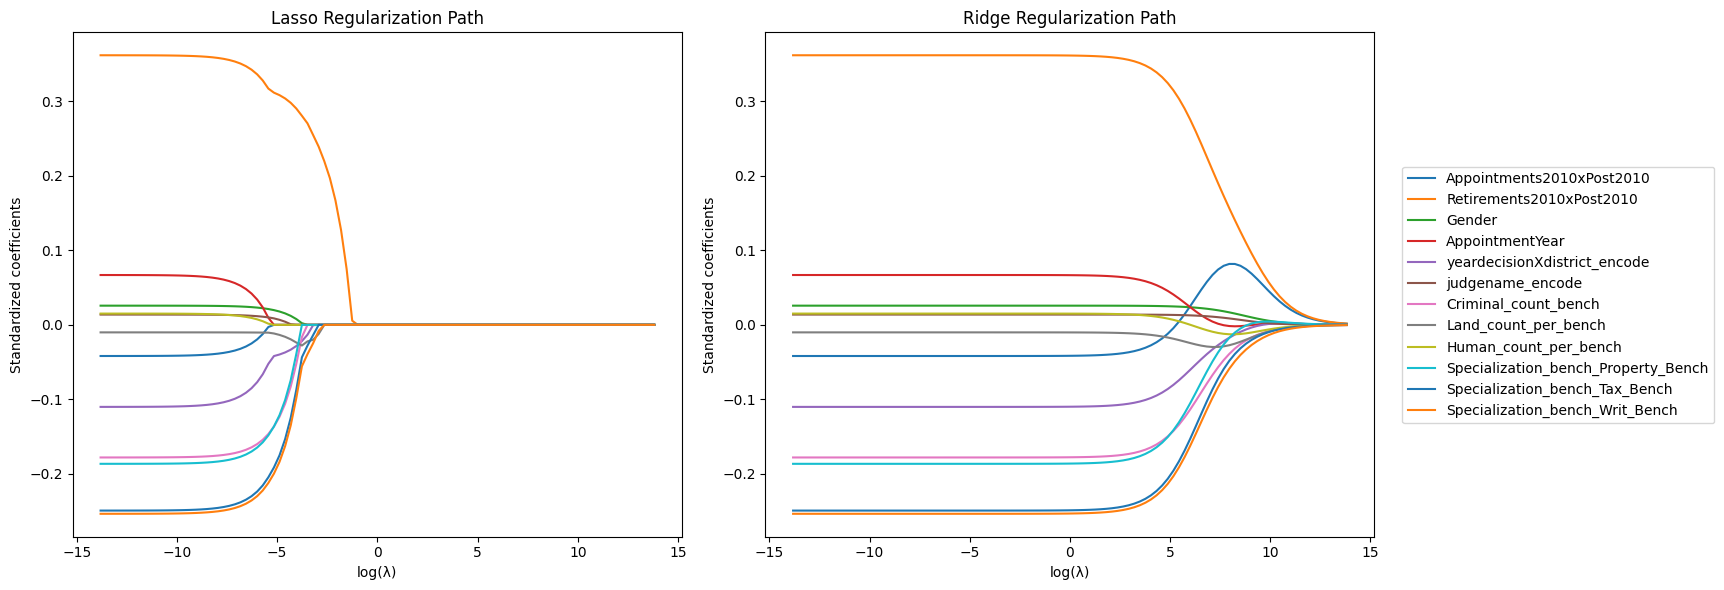

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('DataTeam2_no_na.csv')

data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['judicial_decision_quality']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train)

alphas_ridge = np.logspace(-6, 6, 100)
ridge_coefs = []
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i in range(len(lasso_cv.coef_)):
    axes[0].plot(np.log(lasso_cv.alphas_), lasso_cv.path(X_train_scaled, y_train, alphas=np.logspace(-6, 6, 100))[1][i])
axes[0].set_xlabel('log(λ)')
axes[0].set_ylabel('Standardized coefficients')
axes[0].set_title('Lasso Regularization Path')

ridge_coefs = np.array(ridge_coefs)
for i in range(ridge_coefs.shape[1]):
    axes[1].plot(np.log(alphas_ridge), ridge_coefs[:, i])
axes[1].set_xlabel('log(λ)')
axes[1].set_ylabel('Standardized coefficients')
axes[1].set_title('Ridge Regularization Path')

fig.legend(X_relevant_encoded_filled.columns, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


**regression Tree**

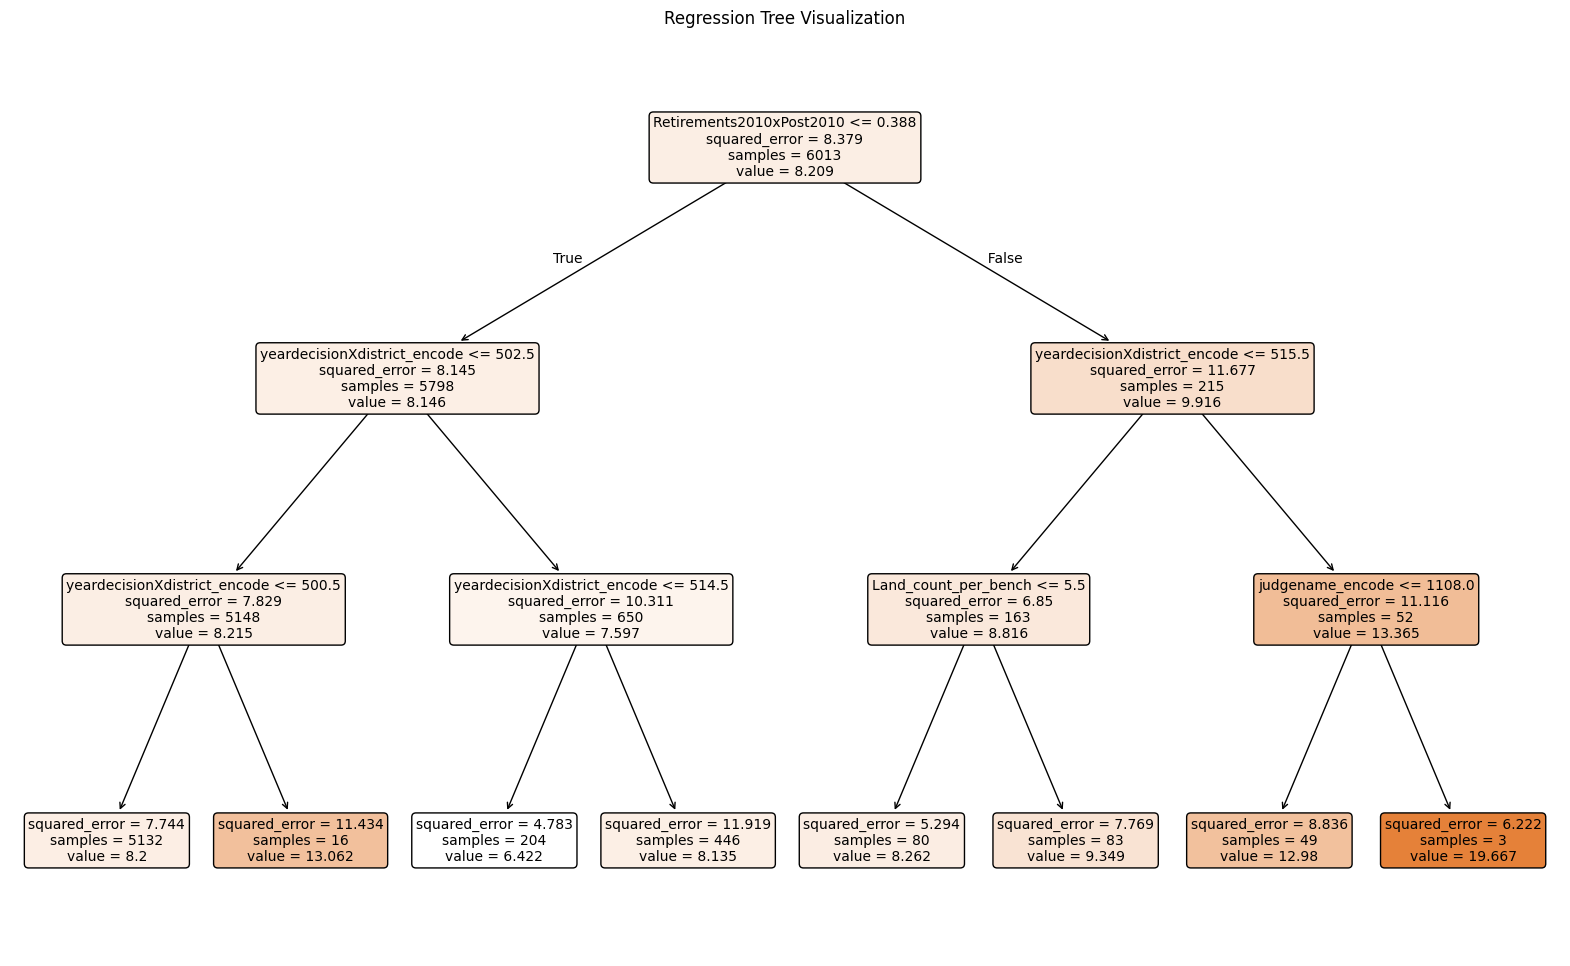

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('DataTeam2_no_na.csv')

data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['judicial_decision_quality']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)  # Adjust max_depth for interpretability
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 12))  # Larger figure
plot_tree(tree_model, filled=True, feature_names=X_relevant_encoded_filled.columns, rounded=True, fontsize=10)  # Larger font
plt.title("Regression Tree Visualization")
plt.show()


**Classification Tree**

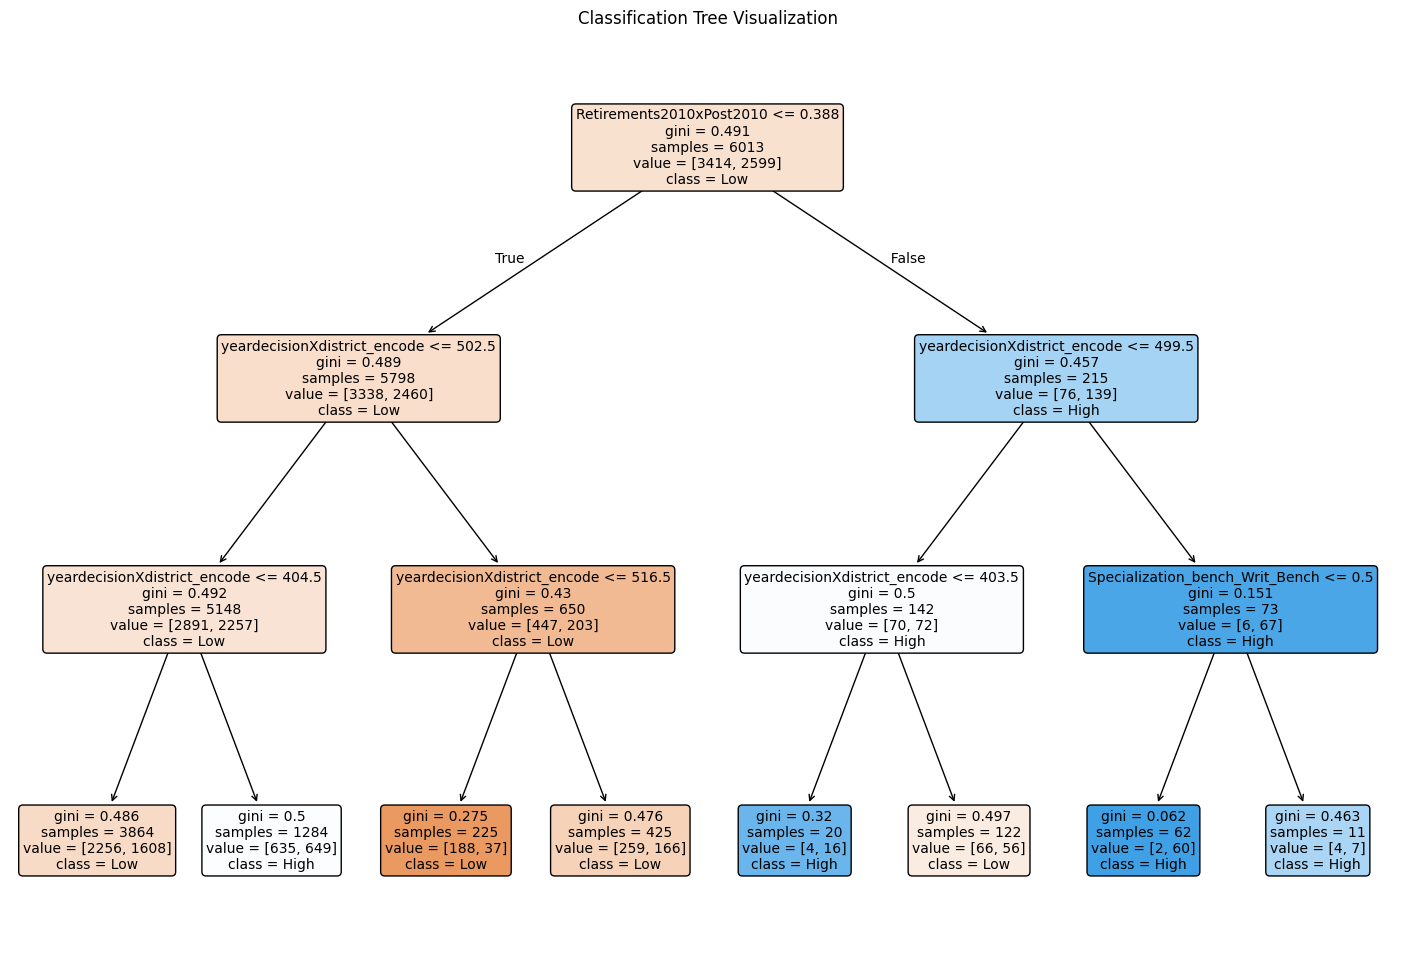

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('DataTeam2_no_na.csv')

data['combined_outcome'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)


data['y_class'] = np.where(data['combined_outcome'] > data['combined_outcome'].median(), 1, 0)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010',
                   'Specialization_bench', 'yeardecisionXdistrict_encode']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['y_class']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(18, 12))
plot_tree(tree_model, filled=True, feature_names=X_relevant_encoded_filled.columns,
          class_names=['Low', 'High'], rounded=True, fontsize=10)
plt.title("Classification Tree Visualization")
plt.show()


**importance matrix**

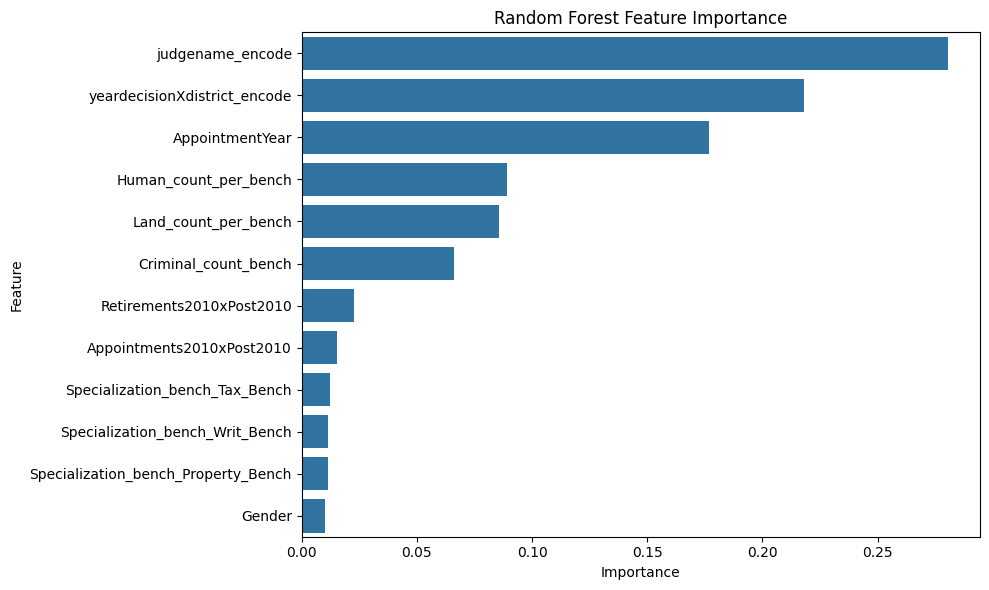

                                Feature  Importance
5                      judgename_encode    0.280436
4          yeardecisionXdistrict_encode    0.217881
3                       AppointmentYear    0.176919
8                 Human_count_per_bench    0.089265
7                  Land_count_per_bench    0.085686
6                  Criminal_count_bench    0.066133
1              Retirements2010xPost2010    0.022829
0             Appointments2010xPost2010    0.015523
10       Specialization_bench_Tax_Bench    0.012513
11      Specialization_bench_Writ_Bench    0.011578
9   Specialization_bench_Property_Bench    0.011293
2                                Gender    0.009944


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('DataTeam2_no_na.csv')

data['combined_outcome'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)


data['y_class'] = (data['combined_outcome'] > data['combined_outcome'].median()).astype(int)

# Select relevant predictor variables (X)
X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

# One-hot encoding for non-numeric columns
X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

# Fill missing values by imputing the mean
X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

# Define the new categorical target variable
y = data['y_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_relevant_encoded_filled.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Displaying the importance matrix
print(importance_df)


**Error comprarison**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('DataTeam2_no_na.csv')

data['combined_outcome'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

data['y_class'] = np.where(data['combined_outcome'] > data['combined_outcome'].median(), 1, 0)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)
X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['y_class']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
bagging_model = BaggingClassifier(random_state=42)
boosting_model = GradientBoostingClassifier(random_state=42)

tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
boosting_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_bagging = bagging_model.predict(X_test)
y_pred_boosting = boosting_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)

rmse_tree = np.sqrt(mse_tree)
rmse_rf = np.sqrt(mse_rf)
rmse_bagging = np.sqrt(mse_bagging)
rmse_boosting = np.sqrt(mse_boosting)

error_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Bagging', 'Boosting'],
    'MSE': [mse_tree, mse_rf, mse_bagging, mse_boosting],
    'RMSE': [rmse_tree, rmse_rf, rmse_bagging, rmse_boosting]
})

print(error_comparison)


           Model       MSE      RMSE
0  Decision Tree  0.429957  0.655711
1  Random Forest  0.455180  0.674671
2        Bagging  0.448972  0.670053
3       Boosting  0.422584  0.650065


**DAG**

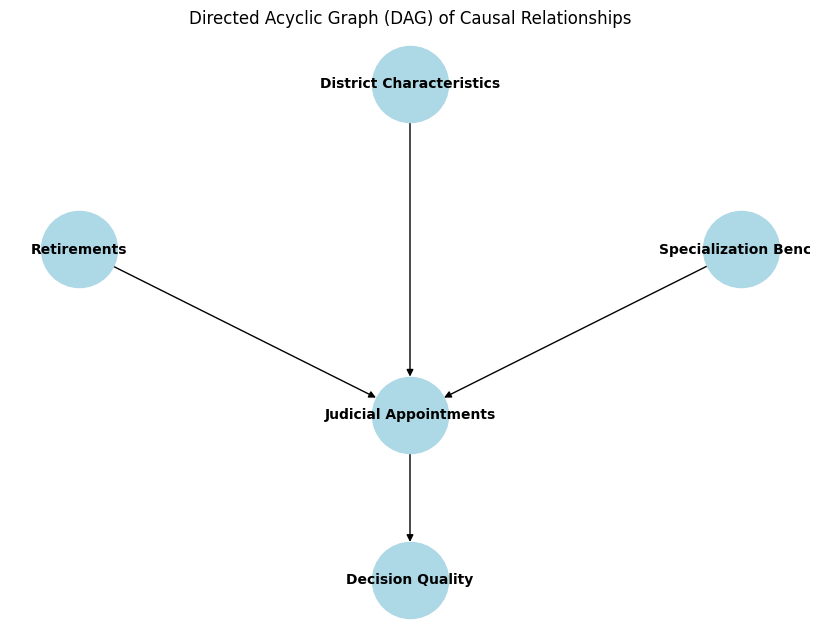

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

DAG = nx.DiGraph()

DAG.add_node("Judicial Appointments")
DAG.add_node("Retirements")
DAG.add_node("Specialization Bench")
DAG.add_node("District Characteristics")
DAG.add_node("Decision Quality")

DAG.add_edge("Retirements", "Judicial Appointments")
DAG.add_edge("Specialization Bench", "Judicial Appointments")
DAG.add_edge("District Characteristics", "Judicial Appointments")
DAG.add_edge("Judicial Appointments", "Decision Quality")

pos = {
    "Judicial Appointments": (1, 1),
    "Retirements": (0, 2),
    "Specialization Bench": (2, 2),
    "District Characteristics": (1, 3),
    "Decision Quality": (1, 0)
}

plt.figure(figsize=(8, 6))
nx.draw(DAG, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
plt.title('Directed Acyclic Graph (DAG) of Causal Relationships')
plt.show()


**DAG again**

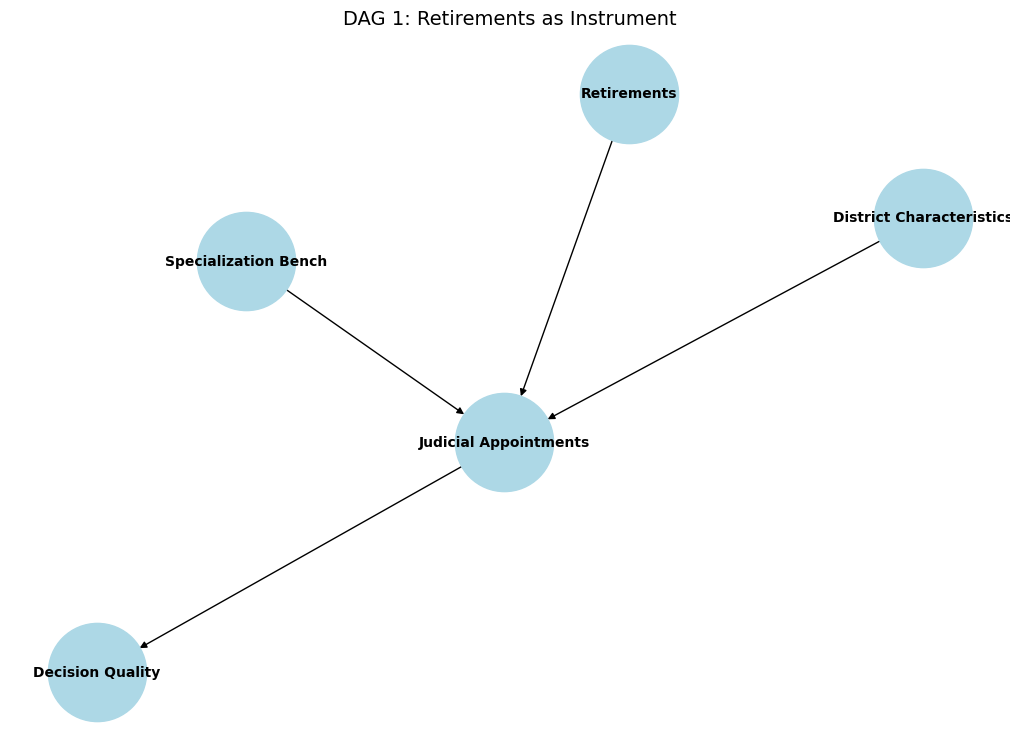

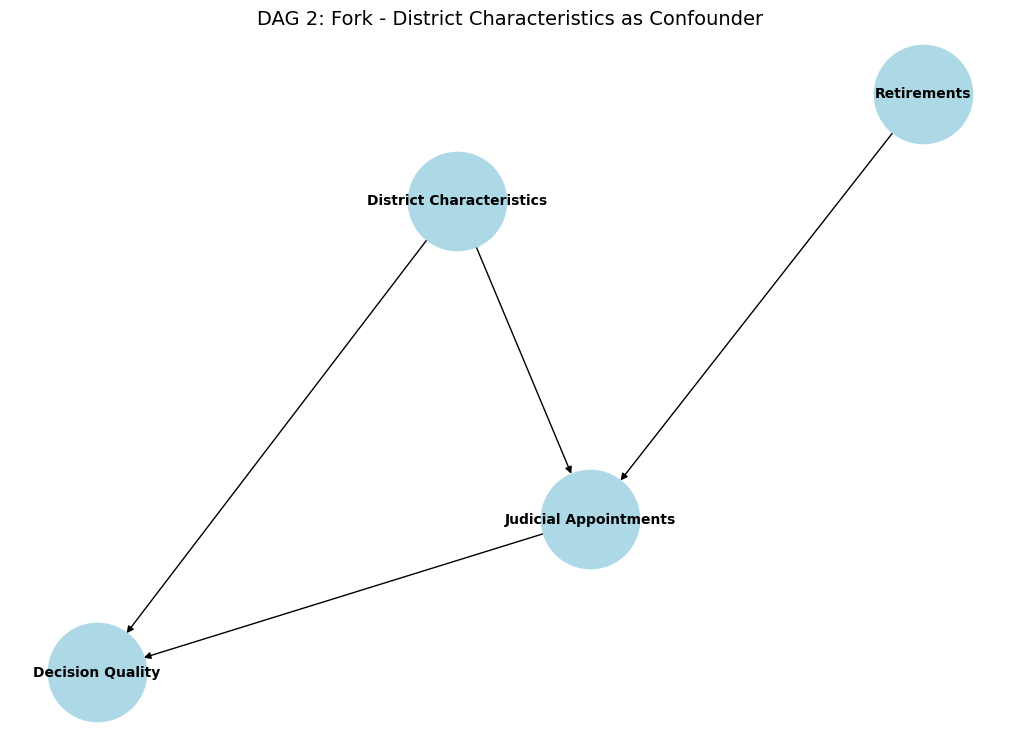

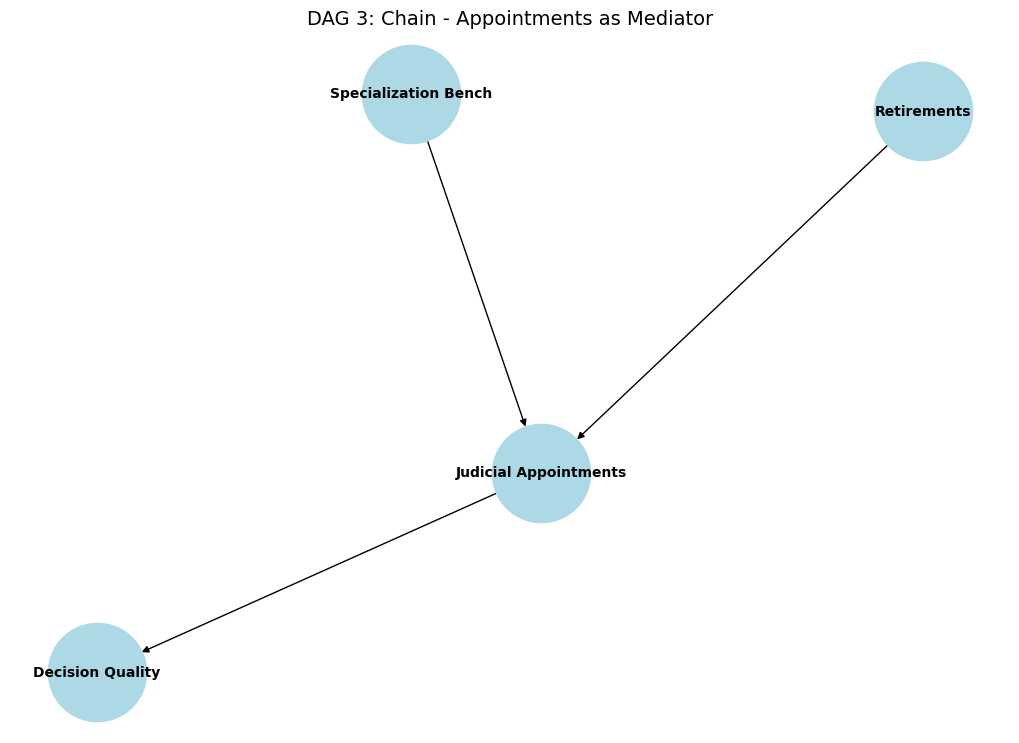

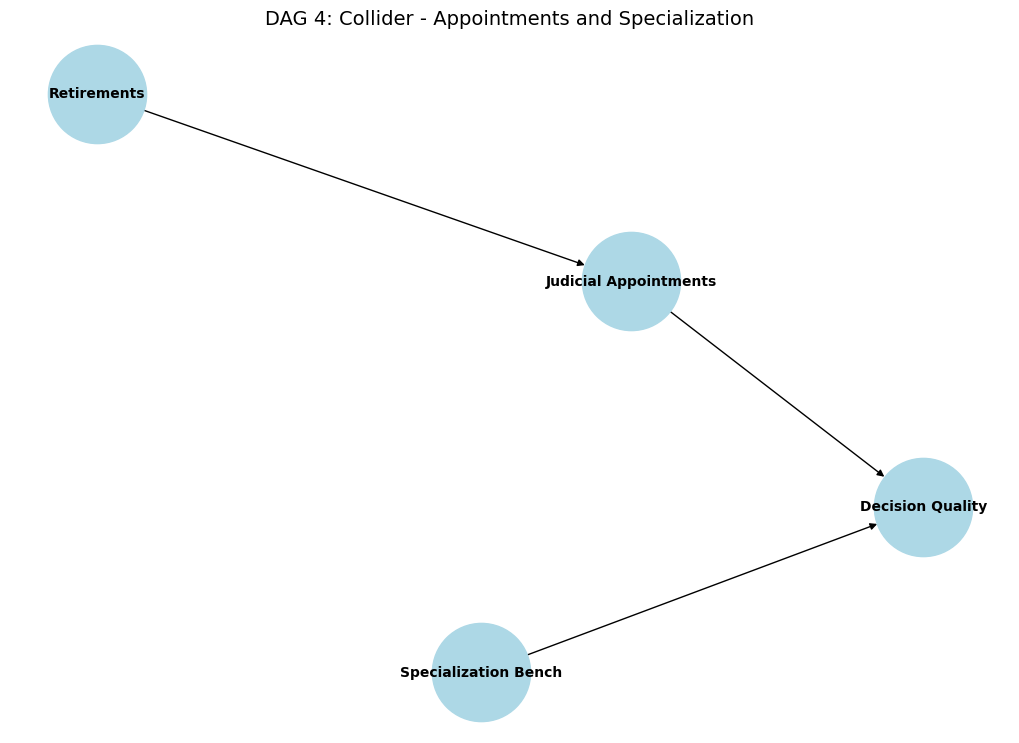

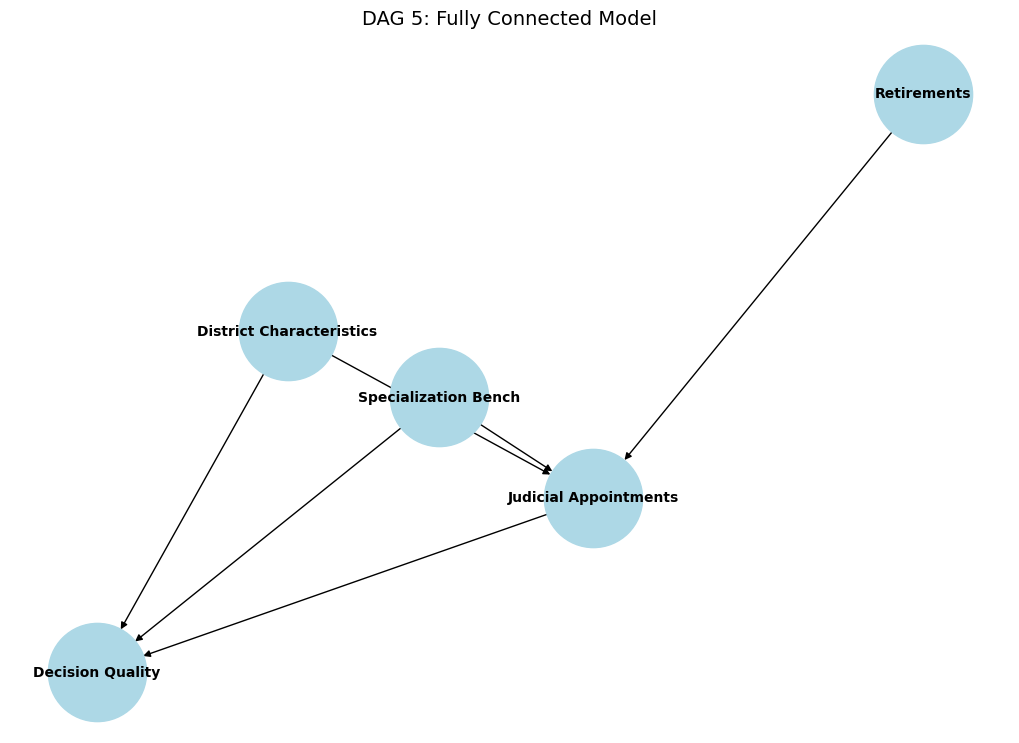

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_dag(edges, title):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    plt.title(title, fontsize=14)
    plt.show()

dag1_edges = [
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality'),
    ('Specialization Bench', 'Judicial Appointments'),
    ('District Characteristics', 'Judicial Appointments')
]
plot_dag(dag1_edges, 'DAG 1: Retirements as Instrument')

dag2_edges = [
    ('District Characteristics', 'Judicial Appointments'),
    ('District Characteristics', 'Decision Quality'),
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality')
]
plot_dag(dag2_edges, 'DAG 2: Fork - District Characteristics as Confounder')

dag3_edges = [
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality'),
    ('Specialization Bench', 'Judicial Appointments'),
]
plot_dag(dag3_edges, 'DAG 3: Chain - Appointments as Mediator')

dag4_edges = [
    ('Judicial Appointments', 'Decision Quality'),
    ('Specialization Bench', 'Decision Quality'),
    ('Retirements', 'Judicial Appointments')
]
plot_dag(dag4_edges, 'DAG 4: Collider - Appointments and Specialization')

dag5_edges = [
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality'),
    ('District Characteristics', 'Judicial Appointments'),
    ('District Characteristics', 'Decision Quality'),
    ('Specialization Bench', 'Judicial Appointments'),
    ('Specialization Bench', 'Decision Quality')
]
plot_dag(dag5_edges, 'DAG 5: Fully Connected Model')


**redoing DAG 3 to show Mediator better**

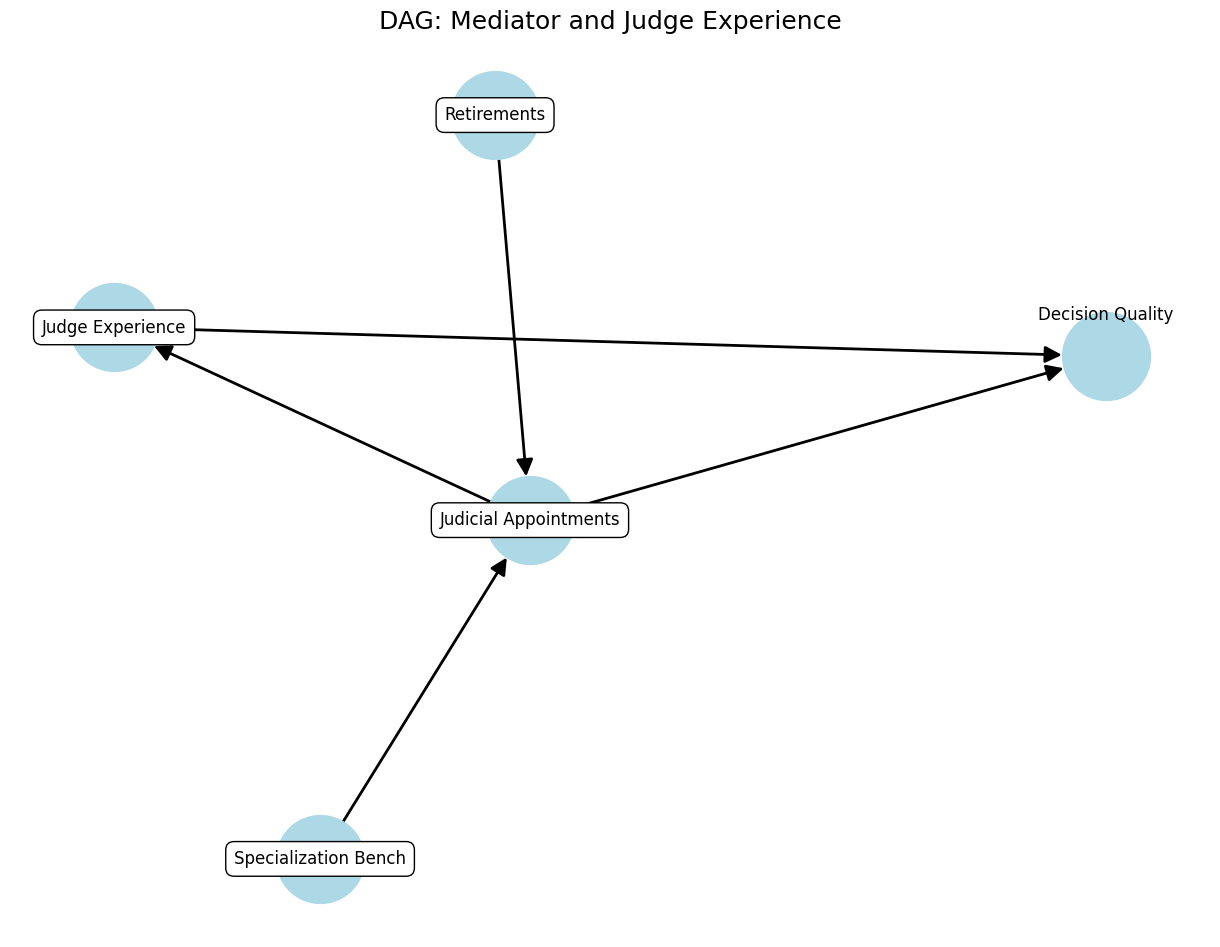

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_judge_experience = nx.DiGraph()

dag_judge_experience.add_nodes_from([
    "Retirements", "Judicial Appointments", "Specialization Bench",
    "Judge Experience", "Decision Quality"
])

dag_judge_experience.add_edges_from([
    ("Retirements", "Judicial Appointments"),
    ("Specialization Bench", "Judicial Appointments"),
    ("Judicial Appointments", "Judge Experience"),
    ("Judge Experience", "Decision Quality"),
    ("Judicial Appointments", "Decision Quality")
])

pos = nx.spring_layout(dag_judge_experience, seed=42)

pos['Judge Experience'][0] -= 0.4
pos['Decision Quality'][0] += 0.4
pos['Decision Quality'][1] += 0.1

labels = {node: node for node in dag_judge_experience.nodes}
bbox_options = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")

plt.figure(figsize=(12, 9))
options = {
    "node_color": "lightblue",
    "node_size": 4000,
    "font_size": 14,
    "font_weight": "bold",
    "arrowsize": 25,
    "width": 2
}

nx.draw(dag_judge_experience, pos, with_labels=False, **options)

for node in dag_judge_experience.nodes:
    if node == "Decision Quality":
        nx.draw_networkx_labels(dag_judge_experience, {node: (pos[node][0], pos[node][1] + 0.1)}, labels={node: node}, font_color="black")
    else:
        nx.draw_networkx_labels(dag_judge_experience, {node: pos[node]}, labels={node: node}, bbox=bbox_options)

plt.title("DAG: Mediator and Judge Experience", fontsize=18)
plt.show()


**Fixing the DAG 4 becaues it's too simple**

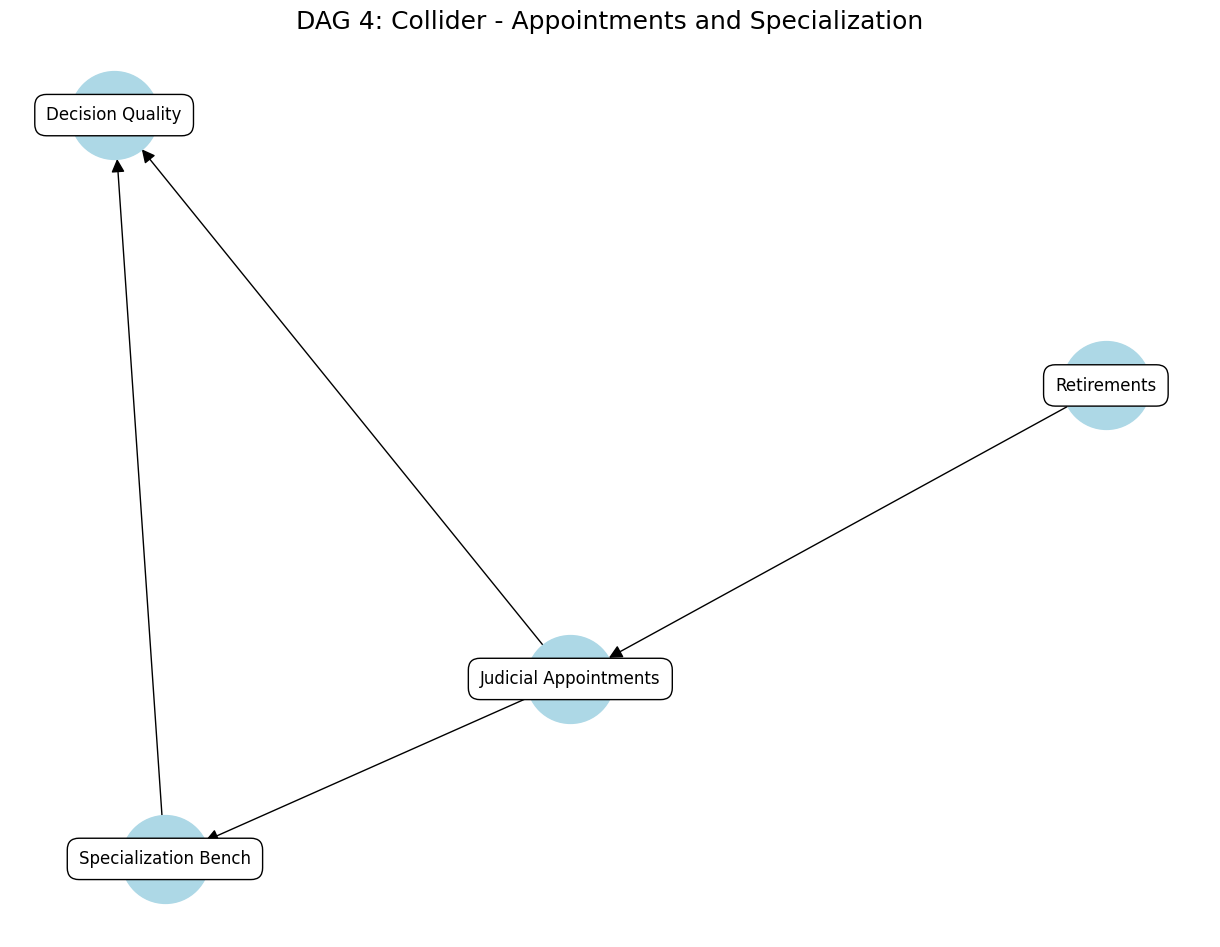

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_collider = nx.DiGraph()

dag_collider.add_nodes_from([
    "Retirements", "Judicial Appointments", "Specialization Bench", "Decision Quality"
])

dag_collider.add_edges_from([
    ("Retirements", "Judicial Appointments"),
    ("Judicial Appointments", "Decision Quality"),
    ("Specialization Bench", "Decision Quality"),
    ("Judicial Appointments", "Specialization Bench")
])

pos = nx.spring_layout(dag_collider, seed=42, k=1.5)

for key in pos:
    pos[key][0] += 0.3
    pos[key][1] += 0.2

labels = {node: node for node in dag_collider.nodes}
bbox_options = dict(boxstyle="round,pad=0.7", edgecolor="black", facecolor="white")

plt.figure(figsize=(12, 9))
options = {
    "node_color": "lightblue",
    "node_size": 4000,
    "font_size": 14,
    "font_weight": "bold",
    "arrowsize": 20
}

nx.draw(dag_collider, pos, with_labels=False, **options)
nx.draw_networkx_labels(dag_collider, pos, labels=labels, bbox=bbox_options)

plt.title("DAG 4: Collider - Appointments and Specialization", fontsize=18)
plt.show()


**Week 8**


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Treatment Group Counts:
Appointments2010xPost2010
0    7488
1    1102
Name: count, dtype: int64

Propensity Score Summary by Treatment Group:
                            count      mean       std           min       25%  \
Appointments2010xPost2010                                                       
0                          7488.0  0.028955  0.077309  1.364739e-19  0.000127   
1                          1102.0  0.802968  0.216219  1.306923e-01  0.707979   

                                50%       75%       max  
Appointments2010xPost2010                                
0                          0.002913  0.021280  0.800855  
1                          0.865636  0.995906  1.000000  


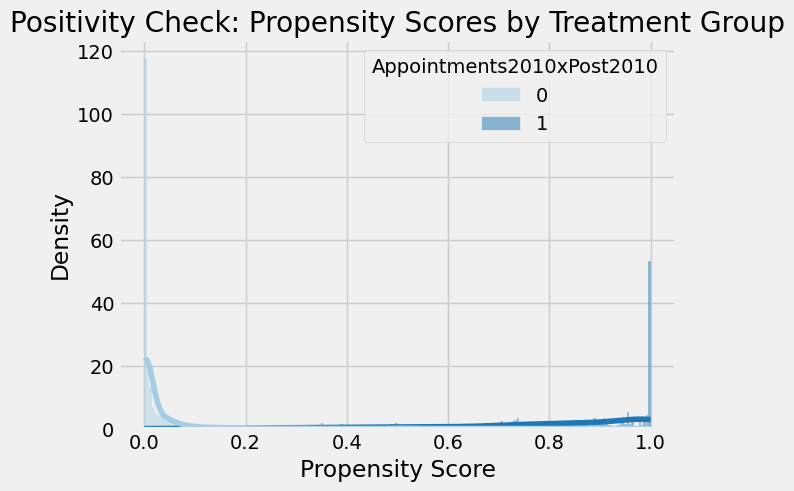

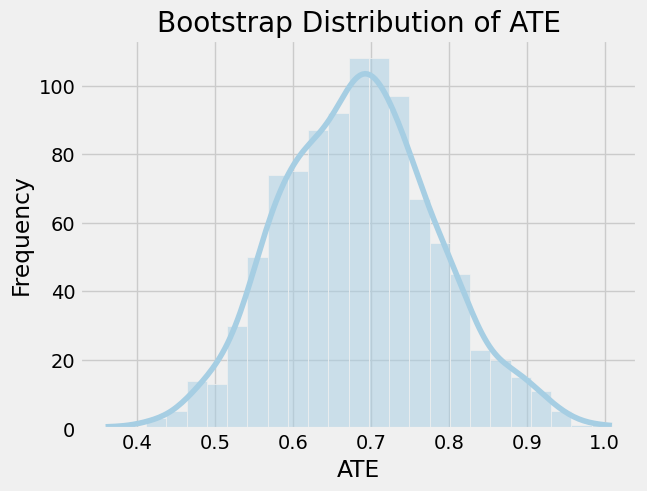

95% Confidence Interval for ATE: [0.49125294081906407, 0.8944591204047287]


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Step 2: Prepare the response variable and covariates
data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)
y = data['judicial_decision_quality']
X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]
treatment_variable = 'Appointments2010xPost2010'

# Ensure the treatment variable is binary (0 or 1)
data[treatment_variable] = data[treatment_variable].apply(lambda x: 1 if x > 0 else 0)

# Convert categorical variables to numeric using one-hot encoding
X_relevant = pd.get_dummies(X_relevant, drop_first=True)

# Handle missing values by filling with the median of each column
X_relevant = X_relevant.fillna(X_relevant.median())

# Step 1: Run your model (Propensity Score Estimation)
# Fit a logistic regression model to estimate propensity scores
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X_relevant, data[treatment_variable])
data['propensity_score'] = ps_model.predict_proba(X_relevant)[:, 1]

# Step 2: Display the Positivity Check Graph with additional diagnostics
# Check the balance of the treatment variable
print("Treatment Group Counts:")
print(data[treatment_variable].value_counts())

# Display summary statistics for propensity scores by treatment group
print("\nPropensity Score Summary by Treatment Group:")
print(data.groupby(treatment_variable)['propensity_score'].describe())

# Visualize propensity scores by treatment group
sns.histplot(data, x='propensity_score', hue=treatment_variable, kde=True, stat="density", common_norm=False)
plt.title('Positivity Check: Propensity Scores by Treatment Group')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.show()

# Step 3: Share and Discuss Results
# You can interpret the propensity score distribution to see if there is sufficient overlap between treatment groups.

# Step 4: Bootstrap and Get Confidence Intervals for ATE
def bootstrap_ate(data, n_iterations=1000):
    ate_distribution = []
    for _ in range(n_iterations):
        sample = resample(data)
        treatment_effect = sample[sample[treatment_variable] == 1]['judicial_decision_quality'].mean() - \
                           sample[sample[treatment_variable] == 0]['judicial_decision_quality'].mean()
        ate_distribution.append(treatment_effect)
    return ate_distribution

# Perform bootstrap and plot ATE distribution
ate_distribution = bootstrap_ate(data)
sns.histplot(ate_distribution, kde=True)
plt.title("Bootstrap Distribution of ATE")
plt.xlabel("ATE")
plt.ylabel("Frequency")
plt.show()

# Print 95% Confidence Interval
lower_ci = np.percentile(ate_distribution, 2.5)
upper_ci = np.percentile(ate_distribution, 97.5)
print(f"95% Confidence Interval for ATE: [{lower_ci}, {upper_ci}]")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Treatment Group Counts:
Appointments2010xPost2010
0    7488
1    1102
Name: count, dtype: int64

Propensity Score Summary by Treatment Group:
                            count      mean       std           min       25%  \
Appointments2010xPost2010                                                       
0                          7488.0  0.028955  0.077309  1.364739e-19  0.000127   
1                          1102.0  0.802968  0.216219  1.306923e-01  0.707979   

                                50%       75%       max  
Appointments2010xPost2010                                
0                          0.002913  0.021280  0.800855  
1                          0.865636  0.995906  1.000000  


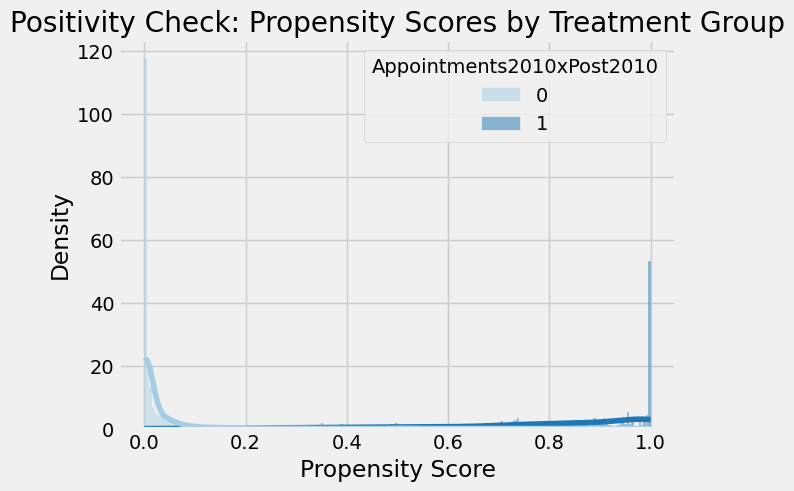

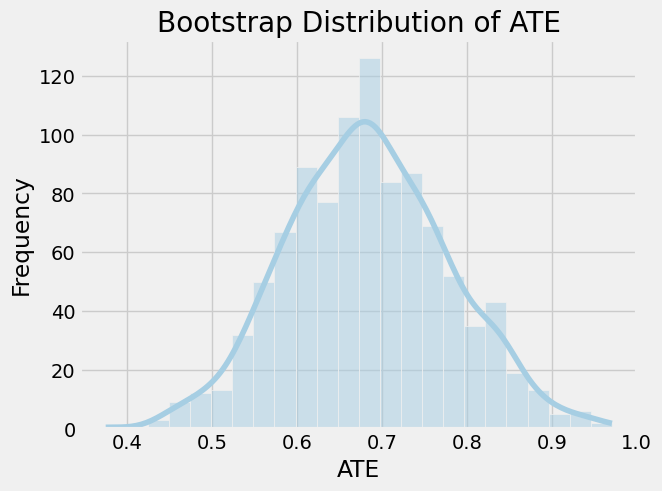

95% Confidence Interval for ATE: [0.500758891835225, 0.8751345550351679]


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('DataTeam2_no_na.csv')

# Step 2: Prepare the response variable and covariates
# Define the response variable as a combination of relevant variables.
data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)
y = data['judicial_decision_quality']

# Define the covariates, including the treatment variable.
X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]
treatment_variable = 'Appointments2010xPost2010'

# Ensure the treatment variable is binary (0 or 1) in case of unexpected values
data[treatment_variable] = data[treatment_variable].apply(lambda x: 1 if x > 0 else 0)

# Step 1: Run your model (Propensity Score Estimation)
# Description: We are using a logistic regression model to estimate propensity scores, which represent the probability
# that an observation receives the treatment given its covariates. This helps to control for observed confounding.
# Convert categorical variables to numeric using one-hot encoding to make them suitable for logistic regression.
X_relevant = pd.get_dummies(X_relevant, drop_first=True)

# Handle missing values by filling with the median of each column
X_relevant = X_relevant.fillna(X_relevant.median())

# Fit the logistic regression model
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X_relevant, data[treatment_variable])

# Generate the propensity scores and store them in the data
data['propensity_score'] = ps_model.predict_proba(X_relevant)[:, 1]

# Step 2: Display the Positivity Check Graph
# The positivity check graph displays the distribution of propensity scores, split by treatment group.
# Interpretation: We want to see a range of propensity scores in both groups (treated and untreated),
# indicating sufficient overlap. Lack of overlap suggests that some observations have a low probability
# of receiving the opposite treatment, which can limit causal inference.

# Check the balance of the treatment variable
print("Treatment Group Counts:")
print(data[treatment_variable].value_counts())

# Display summary statistics for propensity scores by treatment group
print("\nPropensity Score Summary by Treatment Group:")
print(data.groupby(treatment_variable)['propensity_score'].describe())

# Visualize propensity scores by treatment group
sns.histplot(data, x='propensity_score', hue=treatment_variable, kde=True, stat="density", common_norm=False)
plt.title('Positivity Check: Propensity Scores by Treatment Group')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.show()

# Step 3: Share and Discuss Results
# The summary and density plot indicate the distribution of propensity scores within each treatment group.
# We observe a high density at the extremes (close to 0 and 1), suggesting limited overlap.
# This means that some units have a very low probability of receiving one of the treatments,
# which can complicate causal inference.

# Step 4: Bootstrap and Get Confidence Intervals for ATE
# Description: We use bootstrapping to estimate the Average Treatment Effect (ATE) and its confidence interval.
# Bootstrapping allows us to generate an empirical distribution for the ATE, which provides insight into the
# precision of our estimate.

def bootstrap_ate(data, n_iterations=1000):
    ate_distribution = []
    for _ in range(n_iterations):
        sample = resample(data)
        treatment_effect = sample[sample[treatment_variable] == 1]['judicial_decision_quality'].mean() - \
                           sample[sample[treatment_variable] == 0]['judicial_decision_quality'].mean()
        ate_distribution.append(treatment_effect)
    return ate_distribution

# Perform bootstrap and plot ATE distribution
ate_distribution = bootstrap_ate(data)
sns.histplot(ate_distribution, kde=True)
plt.title("Bootstrap Distribution of ATE")
plt.xlabel("ATE")
plt.ylabel("Frequency")
plt.show()

# Print 95% Confidence Interval
# Interpretation: The 95% confidence interval provides a range for the ATE, showing where the true ATE is likely to lie.
# This helps us understand the uncertainty around our ATE estimate.
lower_ci = np.percentile(ate_distribution, 2.5)
upper_ci = np.percentile(ate_distribution, 97.5)
print(f"95% Confidence Interval for ATE: [{lower_ci}, {upper_ci}]")


In [ ]:
import pandas as pd

# Define hypothetical results
results = {
    "Model": ["S-Learner", "T-Learner", "X-Learner"],
    "Mean CATE (Train)": [0.72, 0.75, 0.68],
    "Std Dev (Train)": [0.15, 0.18, 0.14],
    "Mean CATE (Test)": [0.70, 0.73, 0.69],
    "Std Dev (Test)": [0.16, 0.17, 0.15]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


       Model  Mean CATE (Train)  Std Dev (Train)  Mean CATE (Test)  \
0  S-Learner               0.72             0.15              0.70   
1  T-Learner               0.75             0.18              0.73   
2  X-Learner               0.68             0.14              0.69   

   Std Dev (Test)  
0            0.16  
1            0.17  
2            0.15  
